In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [38]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Align_press_CoM')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/BubComp')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/PhaseComp')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
denss = os.listdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/Align_press_CoM')
try:
    denss.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
press = os.listdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/Interpart_press')
try:
    press.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2s = os.listdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/BubComp')
try:
    pres2s.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3s = os.listdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/PhaseComp')
try:
    pres3s.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    # Grab the MCS data
pres4s = os.listdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/radial')
try:
    pres4s.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

/Users/nicklauersdorf/hoomd-blue/build/njlauersdorf/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
/Users/nicklauersdorf/hoomd-blue/build/njlauersdorf/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [39]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [40]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28099  1197.337839           0.0   1197.337839
1       0.1  5.016308       28929  1488.390209           0.0   1488.390209
2       0.2  5.016308       29941  1623.780096           0.0   1623.780096
3       0.3  5.016308       30913  1745.489949           0.0   1745.489949
4       0.4  5.016308       31789  1831.510797           0.0   1831.510797
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       26063  1013.931161           0.0   1013.931161
1995  199.5  5.016308       25887  1021.301795           0.0   1021.301795
1996  199.6  5.016308       26207  1022.161780           0.0   1022.161780
1997  199.7  5.016308       26192  1020.173247           0.0   1020.173247
1998  199.8  5.016308       26407  1027.350844           0.0   1027.350844

[1999 rows x 6 columns]

In [41]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  200  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  350  50.0  1.0  60.0   0.000001
3   0    0  450  50.0  1.0  60.0   0.000001
4   0   50  450  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  250  250  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  350  350  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [42]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28099  1197.337839           0.0   1197.337839
1       0.1  5.016308       28929  1488.390209           0.0   1488.390209
2       0.2  5.016308       29941  1623.780096           0.0   1623.780096
3       0.3  5.016308       30913  1745.489949           0.0   1745.489949
4       0.4  5.016308       31789  1831.510797           0.0   1831.510797
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       26063  1013.931161           0.0   1013.931161
1995  199.5  5.016308       25887  1021.301795           0.0   1021.301795
1996  199.6  5.016308       26207  1022.161780           0.0   1022.161780
1997  199.7  5.016308       26192  1020.173247           0.0   1020.173247
1998  199.8  5.016308       26407  1027.350844           0.0   1027.350844

[1999 rows x 6 columns]

5.016308
28099


In [43]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea   gasSigXX  gasSigXY  gasSigYX   gasSigYY   gasTrace  \
0       0.0  38269.802   2930.856  -294.252  -294.252   3341.832   2842.092   
1       0.1  44471.974  77494.510 -2444.160 -2444.160  85790.184  79198.187   

    bulkArea     bulkSigXX    bulkSigXY    bulkSigYX     bulkSigYY  \
0  24884.897  7.059794e+07     9056.604     9056.604  7.060307e+07   
1  18846.575  4.592046e+08 -3137882.107 -3137882.107  4.591064e+08   

      bulkTrace  Length  NDense  
0  7.060956e+07   515.0   45357  
1  4.560176e+08   477.9   45683

In [44]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  200  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  350  50.0  1.0  60.0   0.000001
3   0    0  450  50.0  1.0  60.0   0.000001
4   0   50  450  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  250  350  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  350  350  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [45]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0          0.0  44844.129    92316.065   -456.802   -456.802    88362.645   
1          0.1  45857.714  1397651.897   8745.932   8745.932  1419559.533   
2          0.2  45653.219  1293193.957 -19261.956 -19261.956  1291883.940   
3          0.3  45372.514  1150175.593   8319.723   8319.723  1153303.840   
4          0.4  45098.161  1038939.876   7485.587   7485.587  1037802.598   
...        ...        ...          ...        ...        ...          ...   
1995     199.5  47994.116  1358566.314  -2450.036  -2450.036  1372793.009   
1996     199.6  47281.559  1299652.346  10087.574  10087.574  1298506.750   
1997     199.7  47483.514  1295001.420  -5172.023  -5172.023  1293273.514   
1998     199.8  47188.838  1274935.358  -7899.448  -7899.448  1260914.551   
1999     199.9  47258.696  1265492.313   1414.851   1414.851  1266629.739   

         gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0       89882.553  18450.287  1.162858e+07    1454.371    1454.371   
1     1417351.647  17413.839  2.167519e+07  -24853.220  -24853.220   
2     1273276.992  17519.262  2.712373e+07 -116010.457 -116010.457   
3     1160059.439  17730.108  3.207330e+07 -206595.301 -206595.301   
4     1045856.824  17899.039  3.670095e+07 -386406.385 -386406.385   
...           ...        ...           ...         ...         ...   
1995  1363229.625  14552.178  2.712346e+07 -175486.731 -175486.731   
1996  1309167.122  14477.239  2.709283e+07 -104773.775 -104773.775   
1997  1288965.444  14590.283  2.707175e+07   80544.832   80544.832   
1998  1260025.507  14672.843  2.729809e+07  316871.268  316871.268   
1999  1267475.877  14763.024  2.751659e+07  117186.348  117186.348   

         bulkSigYY     bulkTrace  Length  NDense  
0     1.162806e+07  1.162978e+07   489.1   28099  
1     2.192005e+07  2.177277e+07   500.4   28929  
2     2.735465e+07  2.712318e+07   522.9   29941  
3     3.236815e+07  3.201413e+07   556.7   30913  
4     3.668538e+07  3.630676e+07   590.6   31789  
...            ...           ...     ...     ...  
1995  2.784309e+07  2.730778e+07   725.8   25887  
1996  2.759999e+07  2.724164e+07   991.8   26207  
1997  2.738462e+07  2.730873e+07   844.1   26192  
1998  2.722713e+07  2.757948e+07   953.5   26407  
1999  2.711447e+07  2.743272e+07   884.7   26498  

[2000 rows x 15 columns]

44844.129
92316.065


In [46]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb     radius  \
0   0.0  5.016308       45357       1       1  7942  20742  93.612591   

   radius_err      sa_ext      sa_int  edge_width  edge_width_err  edge_begin  \
0    1.803694  607.132049  396.498974   35.559082        3.525594   58.053509   

    edge_end  NBin  
0  93.612591   799

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 200.0, 350.0, 450.0, 250.0, 350.0, 450.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [47]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  200  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  350  50.0  1.0  60.0   0.000001
3   0    0  450  50.0  1.0  60.0   0.000001
4   0   50  450  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  350  50.0  1.0  60.0   0.000001
24  0  250  450  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [48]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb     radius  \
0       0.0  5.016308       28099       2       2  9027   5785  86.218605   
1       0.1  5.016308       28929       1       1  7852   5657  84.067983   
2       0.2  5.016308       29941       1       1  7579   7363  88.756423   
3       0.3  5.016308       30913       1       1  7021   8289  88.878930   
4       0.4  5.016308       31789       1       1  6391   8626  86.769166   
...     ...       ...         ...     ...     ...   ...    ...        ...   
3045  199.4  5.016308       26063       2       3    42     66   3.752094   
3046  199.5  5.016308       25887       2       2  2914  11525  75.962884   
3047  199.6  5.016308       26207       1       1  2728  11253  74.939718   
3048  199.7  5.016308       26192       1       1  2734  11217  75.352481   
3049  199.8  5.016308       26407       3       3  3484  11905  77.814927   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       2.551449  566.002157  418.600835   23.901379        4.373878   
1       2.676787  596.115110  403.342331   21.517395        2.760762   
2       3.102743  617.403904  399.559683   26.929242        3.239495   
3       5.133081  633.238223  399.668279   27.042091        5.420300   
4       5.375895  634.991305  403.383937   24.482083        5.756743   
...          ...         ...         ...         ...             ...   
3045    1.404111   35.085886    0.000000    0.000000        0.000000   
3046    8.133624  549.784054  372.148288   22.821240       12.627990   
3047    6.961902  524.270605  366.977504   21.727100       11.687968   
3048    7.165606  523.211632  372.679724   21.496875        5.240507   
3049    7.682916  556.982223  365.445778   25.109338        5.008510   

      edge_begin   edge_end  NBin  
0      62.317226  86.218605   567  
1      62.550588  84.067983   524  
2      61.827182  88.756423   638  
3      61.836839  88.878930   641  
4      62.287083  86.769166   575  
...          ...        ...   ...  
3045    0.000000   0.000000    10  
3046   53.290843  75.962884   482  
3047   53.308468  74.939718   457  
3048   53.855606  75.352481   457  
3049   52.705589  77.814927   520  

[3050 rows x 16 columns]

5.016308
28099


In [49]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/PhaseComp')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0   0.0  5.016308       45357    17031        0        373       0    4285   

   NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0      1429    7942   20742       799       0       0         0

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 200.0, 350.0, 450.0, 250.0, 350.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [50]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  200  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  350  50.0  1.0  60.0   0.000001
3   0    0  450  50.0  1.0  60.0   0.000001
4   0   50  450  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  250  350  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [51]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  \
0       0.0  5.016308       28099    15946        0        434       0   
1       0.1  5.016308       28929    17121        0        442       0   
2       0.2  5.016308       29941    17394        0        431       0   
3       0.3  5.016308       30913    17952        0        431       0   
4       0.4  5.016308       31789    18582        0        437       0   
...     ...       ...         ...      ...      ...        ...     ...   
1994  199.4  5.016308       26063    11205     1221        292   10380   
1995  199.5  5.016308       25887    11414     1437        302   10645   
1996  199.6  5.016308       26207    11473     1563        307   10772   
1997  199.7  5.016308       26192    11528     1745        313   10711   
1998  199.8  5.016308       26407    11102     1513        298   10387   

      Nb_gas  NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0      19242      1600    9027    5785       567       0       0         0  
1      19370      1635    7852    5657       524       0       0         0  
2      17664      1532    7579    7363       638       0       0         0  
3      16738      1529    7021    8289       641       0       0         0  
4      16401      1589    6391    8626       575       0       0         0  
...      ...       ...     ...     ...       ...     ...     ...       ...  
1994   11703      1763    3146   11838       503     242     265        43  
1995   12065      1817    2914   11525       482       0       0         0  
1996   12211      1837    2728   11253       457       0       0         0  
1997   12065      1831    2734   11217       457       0       0         0  
1998   11609      1783    3484   11905       520       0       0         0  

[1999 rows x 15 columns]

5.016308
28099


In [52]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

tauB   sizeBin  clust_size  interface_id  bub_id       r_min       r_max  \
0    0.0  5.016308           2             1       0    0.000000    3.045615   
1    0.0  5.016308           2             1       0    3.045615    6.091230   
2    0.0  5.016308           2             1       0    6.091230    9.136846   
3    0.0  5.016308           2             1       0    9.136846   12.182461   
4    0.0  5.016308           2             1       0   12.182461   15.228076   
..   ...       ...         ...           ...     ...         ...         ...   
37   0.0  5.016308           2             1       0  112.687764  115.733379   
38   0.0  5.016308           2             1       0  115.733379  118.778994   
39   0.0  5.016308           2             1       0  118.778994  121.824610   
40   0.0  5.016308           2             1       0  121.824610  124.870225   
41   0.0  5.016308           2             1       0  124.870225  127.915840   

       align    alignA    alignB  num_dens  num_densA  num_densB      press  \
0  -0.109905 -0.109905       NaN  1.887395   1.887395   0.000000 -93.345707   
1  -0.019819 -0.019819       NaN  1.784446   1.784446   0.000000 -15.914660   
2  -0.015530 -0.015530       NaN  1.811899   1.811899   0.000000 -12.662423   
3   0.027265  0.027265       NaN  1.823665   1.823665   0.000000  22.375181   
4  -0.016079 -0.016079       NaN  1.738691   1.738691   0.000000 -12.580196   
..       ...       ...       ...       ...        ...        ...        ...   
37 -0.040714       NaN -0.040714  0.115760   0.000000   0.115760  -2.120886   
38 -0.074834       NaN -0.074834  0.128352   0.000000   0.128352  -4.322281   
39  0.070742       NaN  0.070742  0.105989   0.000000   0.105989   3.374043   
40  0.018141       NaN  0.018141  0.105914   0.000000   0.105914   0.864622   
41 -0.020531       NaN -0.020531  0.122381   0.000000   0.122381  -1.130661   

       pressA    pressB  
0  -93.345707  0.000000  
1  -15.914660  0.000000  
2  -12.662423  0.000000  
3   22.375181  0.000000  
4  -12.580196  0.000000  
..        ...       ...  
37   0.000000 -2.120886  
38   0.000000 -4.322281  
39   0.000000  3.374043  
40   0.000000  0.864622  
41   0.000000 -1.130661  

[42 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 450.0, 350.0, 200.0, 450.0, 250.0, 350.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [53]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  200  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  350  50.0  1.0  60.0   0.000001
3   0    0  450  50.0  1.0  60.0   0.000001
4   0   50  450  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  250  350  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [54]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           4             2       0    0.000000   
1        0.0  5.016308           4             2       0    3.045615   
2        0.0  5.016308           4             2       0    6.091230   
3        0.0  5.016308           4             2       0    9.136846   
4        0.0  5.016308           4             2       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308          75             3       0  112.687764   
83954  199.8  5.016308          75             3       0  115.733379   
83955  199.8  5.016308          75             3       0  118.778994   
83956  199.8  5.016308          75             3       0  121.824610   
83957  199.8  5.016308          75             3       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.187748 -0.187748  0.000000  1.338334   1.338334   
1        6.091230  0.106669  0.106669  0.000000  1.429845   1.429845   
2        9.136846 -0.001591 -0.001591  0.000000  1.475600   1.475600   
3       12.182461 -0.036186 -0.036186  0.000000  1.455990   1.455990   
4       15.228076 -0.016714 -0.016714  0.000000  1.487038   1.487038   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379  0.045804  0.071351  0.020731  0.489579   0.242502   
83954  118.778994  0.012749  0.004306  0.020042  0.505831   0.234420   
83955  121.824610  0.036924  0.034478  0.039021  0.504319   0.232829   
83956  124.870225  0.002864 -0.002821  0.007747  0.518981   0.239790   
83957  127.915840  0.008700 -0.001029  0.017109  0.517225   0.239800   

       num_densB     press  pressA    pressB  
0       0.000000  0.000000     0.0  0.000000  
1       0.000000  0.000000     0.0  0.000000  
2       0.000000  0.000000     0.0  0.000000  
3       0.000000  0.000000     0.0  0.000000  
4       0.000000  0.000000     0.0  0.000000  
...          ...       ...     ...       ...  
83953   0.247077  1.024447     0.0  1.024447  
83954   0.271410  1.087897     0.0  1.087897  
83955   0.271489  2.118783     0.0  2.118783  
83956   0.279190  0.432588     0.0  0.432588  
83957   0.277424  0.949294     0.0  0.949294  

[83958 rows x 16 columns]

5.016308
4


In [55]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in denss:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(denss, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_denss = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/Align_press_CoM')
for i in denss:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_denss.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_denss[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28090   550.336010    -68.538778    618.874788
1       0.1  5.016308       28567   491.638569   -111.354454    602.993022
2       0.2  5.016308       29079   473.132525    -92.591965    565.724490
3       0.3  5.016308       29520   481.344598    -38.731670    520.076268
4       0.4  5.016308       30023   495.445240    -24.650867    520.096107
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       35415    77.762958    -19.642633     97.405591
1995  199.5  5.016308       35534   107.216612    -43.948668    151.165279
1996  199.6  5.016308       35470   175.709522    -34.452537    210.162059
1997  199.7  5.016308       35439   252.960096     30.736209    222.223887
1998  199.8  5.016308       35536   235.894243     25.913194    209.981049

[1999 rows x 6 columns]

In [56]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
paramss = pd.DataFrame(columns=headers)
for i in range(0, len(all_denss)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    paramss = paramss.append(df, ignore_index = True)
display(paramss)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0  100  100  50.0  1.0  60.0   0.000001
1   0  150  100  50.0  1.0  60.0   0.000001
2   0  150  150  50.0  1.0  60.0   0.000001
3   0  200  100  50.0  1.0  60.0   0.000001
4   0  200  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
21  0  450    0  50.0  1.0  60.0   0.000001
22  0  450  100  50.0  1.0  60.0   0.000001
23  0  450  200  50.0  1.0  60.0   0.000001
24  0  450  250  50.0  1.0  60.0   0.000001
25  0  450  350  50.0  1.0  60.0   0.000001

[26 rows x 7 columns]

In [57]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_denss)):
    # Ger rid of NaN in favor of 0
    all_denss[i].fillna(0, inplace=True)

headers=list(all_denss[0])
display(all_denss[0])
print(all_denss[0][headers[1]][0])
print(all_denss[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28090   550.336010    -68.538778    618.874788
1       0.1  5.016308       28567   491.638569   -111.354454    602.993022
2       0.2  5.016308       29079   473.132525    -92.591965    565.724490
3       0.3  5.016308       29520   481.344598    -38.731670    520.076268
4       0.4  5.016308       30023   495.445240    -24.650867    520.096107
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       35415    77.762958    -19.642633     97.405591
1995  199.5  5.016308       35534   107.216612    -43.948668    151.165279
1996  199.6  5.016308       35470   175.709522    -34.452537    210.162059
1997  199.7  5.016308       35439   252.960096     30.736209    222.223887
1998  199.8  5.016308       35536   235.894243     25.913194    209.981049

[1999 rows x 6 columns]

5.016308
28090


In [58]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in press:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(press, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_press = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/Interpart_press')
for i in press:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_press.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_press[-1])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0          0.0  38527.643    12339.243   -154.004   -154.004    11981.698   
1          0.1  36618.599    23280.374   -654.134   -654.134    21288.168   
2          0.2  35940.336    72813.196   -482.231   -482.231    78778.334   
3          0.3  37428.958   875747.832   1073.566   1073.566   874727.092   
4          0.4  36383.620   210494.356   3101.538   3101.538   211247.726   
...        ...        ...          ...        ...        ...          ...   
1995     199.5  48485.667  2164490.527 -13735.963 -13735.963  2187777.193   
1996     199.6  48829.879  2281648.235 -14629.139 -14629.139  2261462.735   
1997     199.7  48481.856  2349650.710   8414.601   8414.601  2340249.266   
1998     199.8  47761.678  2227398.804  12810.533  12810.533  2240059.979   
1999     199.9  48310.385  2320983.629 -18170.017 -18170.017  2296731.152   

         gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0       12006.466  24574.979  3.519521e+07   10647.549   10647.549   
1       21630.137  22292.509  4.671091e+07 -336233.582 -336233.582   
2       75313.534  20698.463  5.269610e+07 -445154.951 -445154.951   
3      876311.028  19846.188  5.763997e+07 -364879.246 -364879.246   
4      213972.579  20627.334  5.899276e+07 -190155.183 -190155.183   
...           ...        ...           ...         ...         ...   
1995  2162397.896  10856.024  5.074735e+07  153944.795  153944.795   
1996  2256926.346  11024.954  5.038507e+07 -606611.356 -606611.356   
1997  2353364.589  10805.218  4.960720e+07 -794804.963 -794804.963   
1998  2246539.925  10880.157  4.937122e+07 -991418.937 -991418.937   
1999  2290687.374  10890.318  4.986080e+07 -113749.873 -113749.873   

         bulkSigYY     bulkTrace  Length  NDense  
0     3.519747e+07  3.520699e+07   531.9   41134  
1     4.726104e+07  4.664974e+07  1523.7   41061  
2     5.302322e+07  5.241451e+07  2114.3   40823  
3     5.974005e+07  5.832513e+07  1910.3   26063  
4     5.943629e+07  5.902437e+07  1913.7   28834  
...            ...           ...     ...     ...  
1995  5.042688e+07  5.074106e+07  1683.8   23764  
1996  4.915761e+07  4.916473e+07  1521.5   23580  
1997  4.899458e+07  4.850609e+07  1715.3   23750  
1998  4.876501e+07  4.807670e+07  1932.8   24106  
1999  4.970800e+07  4.967065e+07  1745.7   23740  

[2000 rows x 15 columns]

In [59]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2s = pd.DataFrame(columns=headers)
for i in range(0, len(all_press)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2s = params2s.append(df, ignore_index = True)
display(params2s)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0  100  100  50.0  1.0  60.0   0.000001
1   0  150  100  50.0  1.0  60.0   0.000001
2   0  150  150  50.0  1.0  60.0   0.000001
3   0  200  100  50.0  1.0  60.0   0.000001
4   0  200  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
21  0  450  250  50.0  1.0  60.0   0.000001
22  0  450  350  50.0  1.0  60.0   0.000001
23  0  450  450  50.0  1.0  60.0   0.000001
24  0  450   50  50.0  1.0  60.0   0.000001
25  0  450    0  50.0  1.0  60.0   0.000001

[26 rows x 7 columns]

In [60]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_press)):
    # Ger rid of NaN in favor of 0
    all_press[i].fillna(0, inplace=True)

headers=list(all_press[0])
display(all_press[0])
print(all_press[0][headers[1]][0])
print(all_press[0][headers[2]][0])

Timestep    gasArea    gasSigXX  gasSigXY  gasSigYX    gasSigYY  \
0          0.0  44841.589   90354.471  1306.579  1306.579   89874.079   
1          0.1  44959.714  833984.872 -1194.812 -1194.812  836546.354   
2          0.2  44614.231  821227.344  2402.590  2402.590  819091.428   
3          0.3  44225.563  775778.057  1274.883  1274.883  765483.677   
4          0.4  43734.013  768738.642 -2527.938 -2527.938  768711.139   
...        ...        ...         ...       ...       ...         ...   
1995     199.5  38400.628  393099.661  -822.650  -822.650  398043.908   
1996     199.6  38380.305  386029.159  -552.611  -552.611  393161.621   
1997     199.7  38523.833  390047.656 -1987.835 -1987.835  396376.662   
1998     199.8  38340.930  396028.178 -1271.395 -1271.395  391523.926   
1999     199.9  38320.608  380895.998 -2475.002 -2475.002  368340.384   

        gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0      91420.854  18433.775  1.162850e+07    -473.247    -473.247   
1     834070.801  18201.336  1.482193e+07    1516.362    1516.362   
2     822561.976  18506.174  1.553521e+07   98215.598   98215.598   
3     771905.751  18800.850  1.583556e+07  121404.865  121404.865   
4     766196.953  19180.626  1.585247e+07   12972.694   12972.694   
...          ...        ...           ...         ...         ...   
1995  394749.134  23059.683  1.658549e+07  -33769.563  -33769.563   
1996  389042.778  22903.454  1.645418e+07  -22424.495  -22424.495   
1997  391224.324  22919.966  1.639145e+07  -40421.206  -40421.206   
1998  392504.657  23007.607  1.639467e+07  -93504.386  -93504.386   
1999  372143.189  23033.010  1.636645e+07  -31920.942  -31920.942   

         bulkSigYY     bulkTrace  Length  NDense  
0     1.162747e+07  1.162751e+07   489.1   28090  
1     1.497799e+07  1.490148e+07   520.7   28567  
2     1.556530e+07  1.564847e+07   535.3   29079  
3     1.574416e+07  1.591127e+07   569.1   29520  
4     1.578959e+07  1.583400e+07   604.1   30023  
...            ...           ...     ...     ...  
1995  1.656189e+07  1.653992e+07   969.2   35534  
1996  1.647558e+07  1.644246e+07  1012.1   35470  
1997  1.626144e+07  1.628602e+07   965.8   35439  
1998  1.631133e+07  1.625950e+07   990.6   35536  
1999  1.625602e+07  1.627932e+07   987.3   35555  

[2000 rows x 15 columns]

44841.58900000001
90354.47099999999


In [61]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2s:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2s, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_news = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/BubComp')
for i in pres2s:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_news.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_news[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb     radius  \
0       0.0  5.016308       44899       1       1  11293  20391  94.248120   
1       0.0  5.016308       44899       1       2    427      0   3.896981   
2       0.0  5.016308       44899       1       3    427      0   3.896981   
3       0.1  5.016308       45162       1       1   7413  20415  84.431557   
4       0.2  5.016308       45556       1       1   7492  20984  85.394513   
...     ...       ...         ...     ...     ...    ...    ...        ...   
2029  199.4  5.016308       42977       1       1   9051   8896  89.188731   
2030  199.5  5.016308       43231       1       1   9014   8812  88.704655   
2031  199.6  5.016308       43401       1       1   8928   8744  89.902064   
2032  199.7  5.016308       43428       2       2   9012   8769  89.099081   
2033  199.8  5.016308       43551       1       1   9229   8962  89.681017   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  NBin  
0       1.519921  611.115289  449.052835   38.698557        6.011926   885  
1       1.850687   31.442451    0.000000    3.896981        1.850687    10  
2       1.850687   31.442451    0.000000    3.896981        1.850687    10  
3       1.223865  550.145476  335.433234   32.215573        2.636876   658  
4       1.808936  556.842153  342.054236   32.954313        3.400261   679  
...          ...         ...         ...         ...             ...   ...  
2029    5.597826  602.923153  473.509477   20.787743       11.205606   544  
2030    5.315145  596.045107  470.839581   19.926334       10.772948   523  
2031    4.873955  619.508203  473.111413   20.452328        9.795924   543  
2032    4.161600  610.158339  473.509931   19.834297        9.091212   530  
2033    4.583806  609.207906  478.747393   20.676599       10.024571   545  

[2034 rows x 14 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [100.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0], [100.0, 100.0, 150.0, 100.0, 150.0, 200.0, 50.0, 50.0, 0.0, 100.0, 150.0, 200.0, 250.0, 0.0, 100.0, 200.0, 250.0, 350.0, 50.0, 450.0, 50.0, 0.0, 100.0, 200.0, 250.0, 350.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3s = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_news)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3s = params3s.append(df, ignore_index = True)
display(params3s)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0  100  100  50.0  1.0  60.0   0.000001
1   0  150  100  50.0  1.0  60.0   0.000001
2   0  150  150  50.0  1.0  60.0   0.000001
3   0  200  100  50.0  1.0  60.0   0.000001
4   0  200  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
21  0  450    0  50.0  1.0  60.0   0.000001
22  0  450  100  50.0  1.0  60.0   0.000001
23  0  450  200  50.0  1.0  60.0   0.000001
24  0  450  250  50.0  1.0  60.0   0.000001
25  0  450  350  50.0  1.0  60.0   0.000001

[26 rows x 7 columns]

In [63]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_news)):
    # Ger rid of NaN in favor of 0
    all_pres_news[i].fillna(0, inplace=True)

headers=list(all_pres_news[0])
display(all_pres_news[0])
print(all_pres_news[0][headers[1]][0])
print(all_pres_news[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb     radius  \
0    0.0  5.016308       28090       1       1  8590   5577  85.464927   
1    0.1  5.016308       28567       1       1  7896   5484  84.841898   
2    0.2  5.016308       29079       1       1  7352   6089  86.468648   
3    0.2  5.016308       29079       1       2     0    163   5.104896   
4    0.3  5.016308       29520       1       1  6683   6397  86.960384   
..   ...       ...         ...     ...     ...   ...    ...        ...   
87   3.9  5.016308       34807       3       9     6    178   6.924275   
88   3.9  5.016308       34807       3       5    12    151   6.978846   
89   3.9  5.016308       34807       3       1     3    133   7.641835   
90   4.0  5.016308       34851       2       2  3993  12292  96.715267   
91   4.0  5.016308       34851       2       3     6    169   7.552124   

    radius_err      sa_ext      sa_int  edge_width  edge_width_err  NBin  
0     2.475714  567.574263  419.577458   22.521887        5.488175   541  
1     3.089875  573.253602  419.907640   20.992721        4.881461   519  
2     2.912976  612.014539  421.047985   21.857546        4.672688   544  
3     1.371347   36.832149    0.000000    5.104896        1.371347    12  
4     2.952896  604.417926  429.886452   21.292444        4.989022   538  
..         ...         ...         ...         ...             ...   ...  
87    2.581994   64.794137    0.000000    6.924275        2.581994    17  
88    1.051777   45.472889    0.000000    6.978846        1.051777    18  
89    4.001799   62.208396    0.000000    7.641835        4.001799    14  
90    6.063333  698.892117  490.472523   25.375746       11.138113   684  
91    0.906600   51.208868    0.000000    7.552124        0.906600    16  

[92 rows x 14 columns]

5.016308
28090


In [64]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3s:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3s, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2s = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/PhaseComp')
for i in pres3s:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2s.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2s[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  \
0       0.0  5.016308       44899    12826        0        282       0   
1       0.1  5.016308       45162    17560        0        302       0   
2       0.2  5.016308       45556    17481        0        303       0   
3       0.3  5.016308       45818    19214        0        343       0   
4       0.4  5.016308       45902    20492        0        377       0   
...     ...       ...         ...      ...      ...        ...     ...   
1994  199.4  5.016308       42977    13051    12689        524    2871   
1995  199.5  5.016308       43231    13210    12857        532    2749   
1996  199.6  5.016308       43401    13405    13062        542    2640   
1997  199.7  5.016308       43428    13316    12988        540    2645   
1998  199.8  5.016308       43551    13186    12877        535    2558   

      Nb_gas  NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0       4636      1414   11293   20391       885     854       0        20  
1       4612      1641    7413   20415       658       0       0         0  
2       4043      1619    7492   20984       679       0       0         0  
3       3743      1602    5759   21284       656       0       0         0  
4       3700      1583    4481   21327       641       0       0         0  
...      ...       ...     ...     ...       ...     ...     ...       ...  
1994    3442      1533    9051    8896       544       0       0         0  
1995    3358      1546    9014    8812       523       0       0         0  
1996    3221      1516    8928    8744       543       0       0         0  
1997    3270      1531    9012    8769       530       0       0         0  
1998    3188      1521    9229    8962       545       0       0         0  

[1999 rows x 15 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [100.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0], [100.0, 100.0, 150.0, 100.0, 150.0, 200.0, 50.0, 50.0, 0.0, 100.0, 150.0, 200.0, 250.0, 0.0, 100.0, 200.0, 250.0, 350.0, 50.0, 450.0, 50.0, 0.0, 100.0, 200.0, 250.0, 350.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [68]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4s = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new2s)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4s = params4s.append(df, ignore_index = True)
display(params4s)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0  100  100  50.0  1.0  60.0   0.000001
1   0  150  100  50.0  1.0  60.0   0.000001
2   0  150  150  50.0  1.0  60.0   0.000001
3   0  200  100  50.0  1.0  60.0   0.000001
4   0  200  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
21  0  450    0  50.0  1.0  60.0   0.000001
22  0  450  100  50.0  1.0  60.0   0.000001
23  0  450  200  50.0  1.0  60.0   0.000001
24  0  450  250  50.0  1.0  60.0   0.000001
25  0  450  350  50.0  1.0  60.0   0.000001

[26 rows x 7 columns]

In [69]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2s)):
    # Ger rid of NaN in favor of 0
    all_pres_new2s[i].fillna(0, inplace=True)

headers=list(all_pres_new2s[0])
display(all_pres_new2s[0])
print(all_pres_new2s[0][headers[1]][0])
print(all_pres_new2s[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0    0.0  5.016308       28090    16383        0        445       0   19450   
1    0.1  5.016308       28567    17077        0        458       0   19543   
2    0.2  5.016308       29079    17621        0        470       0   18775   
3    0.3  5.016308       29520    18290        0        486       0   18630   
4    0.4  5.016308       30023    19223        0        512       0   17841   
..   ...       ...         ...      ...      ...        ...     ...     ...   
37   3.7  5.016308       34589    20078      437        559     554   13365   
38   3.8  5.016308       34682    20664      594        580     454   13044   
39   3.9  5.016308       34807    18700      343        519     467   12180   
40   4.0  5.016308       34851    20528      490        574     446   12076   
41   4.1  5.016308       35014    17152      442        479     497   11652   

    NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0       1615    8590    5577       541       0       0         0  
1       1624    7896    5484       519       0       0         0  
2       1575    7352    6089       544       0     163        12  
3       1577    6683    6397       538       0       0         0  
4       1529    5750    7186       560       0       0         0  
..       ...     ...     ...       ...     ...     ...       ...  
37      1429    3814   11093       585     527     132        28  
38      1411    3848   11205       590       7     184        20  
39      1332    5346   12042       689     460     462        61  
40      1327    3993   12292       684       6     169        16  
41      1300    5929   12660       756    1395     273        66  

[42 rows x 15 columns]

5.016308
28090


In [70]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4s:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4s, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3s = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/slow_out_txt_files/radial')
for i in pres4s:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3s.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3s[-1])
print(storeVals)

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           2             1       0    0.000000   
1        0.0  5.016308           2             1       0    3.045615   
2        0.0  5.016308           2             1       0    6.091230   
3        0.0  5.016308           2             1       0    9.136846   
4        0.0  5.016308           2             1       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308           9             1       0  112.687764   
83954  199.8  5.016308           9             1       0  115.733379   
83955  199.8  5.016308           9             1       0  118.778994   
83956  199.8  5.016308           9             1       0  121.824610   
83957  199.8  5.016308           9             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.059889 -0.059889       NaN  1.887395   1.887395   
1        6.091230 -0.009640 -0.009640       NaN  1.715813   1.715813   
2        9.136846  0.033282  0.033282       NaN  1.777583   1.777583   
3       12.182461 -0.009756 -0.009756       NaN  1.799153   1.799153   
4       15.228076 -0.003113 -0.003113       NaN  1.731065   1.731065   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379  0.005355 -0.014306  0.019108  0.150076   0.061769   
83954  118.778994 -0.023963 -0.047760 -0.005686  0.152863   0.066404   
83955  121.824610  0.002328 -0.002541  0.006588  0.156378   0.072976   
83956  124.870225 -0.063944 -0.044073 -0.077738  0.147857   0.060583   
83957  127.915840 -0.064968 -0.085216 -0.045208  0.135611   0.066979   

       num_densB      press     pressA    pressB  
0       0.000000 -50.865574 -50.865574  0.000000  
1       0.000000  -7.443101  -7.443101  0.000000  
2       0.000000  26.622637  26.622637  0.000000  
3       0.000000  -7.898621  -7.898621  0.000000  
4       0.000000  -2.425138  -2.425138  0.000000  
...          ...        ...        ...       ...  
83953   0.088307   0.192941  -0.397643  0.590584  
83954   0.086459  -1.599229  -1.427157 -0.172072  
83955   0.083402   0.108850  -0.083454  0.192305  
83956   0.087273  -3.576115  -1.201543 -2.374573  
83957   0.068633  -3.654400  -2.568435 -1.085966  

[83958 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [100.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0], [100.0, 100.0, 150.0, 100.0, 150.0, 200.0, 50.0, 50.0, 0.0, 100.0, 150.0, 200.0, 250.0, 0.0, 100.0, 200.0, 250.0, 350.0, 50.0, 450.0, 50.0, 0.0, 100.0, 200.0, 250.0, 350.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5s = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3s)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5s = params5s.append(df, ignore_index = True)
display(params5s)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0  100  100  50.0  1.0  60.0   0.000001
1   0  150  100  50.0  1.0  60.0   0.000001
2   0  150  150  50.0  1.0  60.0   0.000001
3   0  200  100  50.0  1.0  60.0   0.000001
4   0  200  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
21  0  450    0  50.0  1.0  60.0   0.000001
22  0  450  100  50.0  1.0  60.0   0.000001
23  0  450  200  50.0  1.0  60.0   0.000001
24  0  450  250  50.0  1.0  60.0   0.000001
25  0  450  350  50.0  1.0  60.0   0.000001

[26 rows x 7 columns]

In [72]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3s)):
    # Ger rid of NaN in favor of 0
    all_pres_new3s[i].fillna(0, inplace=True)

headers=list(all_pres_new3s[0])
display(all_pres_new3s[0])
print(all_pres_new3s[0][headers[1]][0])
print(all_pres_new3s[0][headers[2]][0])

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           3             1       0    0.000000   
1        0.0  5.016308           3             1       0    3.045615   
2        0.0  5.016308           3             1       0    6.091230   
3        0.0  5.016308           3             1       0    9.136846   
4        0.0  5.016308           3             1       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308          21             1       0  112.687764   
83954  199.8  5.016308          21             1       0  115.733379   
83955  199.8  5.016308          21             1       0  118.778994   
83956  199.8  5.016308          21             1       0  121.824610   
83957  199.8  5.016308          21             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.050720 -0.050720  0.000000  1.269702   1.269702   
1        6.091230 -0.036610 -0.036610  0.000000  1.452722   1.452722   
2        9.136846  0.042313  0.042313  0.000000  1.475600   1.475600   
3       12.182461 -0.003304 -0.003304  0.000000  1.460893   1.460893   
4       15.228076 -0.020111 -0.020111  0.000000  1.475600   1.475600   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379  0.002684 -0.045101  0.043644  0.344993   0.159227   
83954  118.778994  0.064446 -0.013896  0.135495  0.356087   0.169353   
83955  121.824610  0.014304 -0.035752  0.059573  0.380520   0.180703   
83956  124.870225  0.005073 -0.004954  0.013790  0.351636   0.163532   
83957  127.915840  0.000556 -0.056356  0.050773  0.357220   0.167447   

       num_densB     press    pressA    pressB  
0       0.000000 -6.439869 -6.439869  0.000000  
1       0.000000 -5.318469 -5.318469  0.000000  
2       0.000000  6.243758  6.243758  0.000000  
3       0.000000 -0.482664 -0.482664  0.000000  
4       0.000000 -2.967511 -2.967511  0.000000  
...          ...       ...       ...       ...  
83953   0.185765  0.092611 -0.718136  0.810748  
83954   0.186734  2.294822 -0.235327  2.530149  
83955   0.199816  0.544313 -0.646051  1.190364  
83956   0.188104  0.178391 -0.081010  0.259401  
83957   0.189773  0.019861 -0.943666  0.963527  

[83958 rows x 16 columns]

5.016308
3


In [73]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [74]:
#Constants
kT = 1.0                        # temperature
threeEtaPiSigma = 1.0           # drag coefficient
sigma = 1.0                     # particle diameter
D_t = kT / threeEtaPiSigma      # translational diffusion constant
D_r = (3.0 * D_t) / (sigma**2)  # rotational diffusion constant
tauBrown = (sigma**2) / D_t     # brownian time scale (invariant)



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

#Slow activities interested in
pe_a = [0, 100, 150, 200, 250, 350, 450]
#Fast activities interested in
pe_b = [0, 100, 150, 200, 250, 350, 450]

#Particle fraction of slow activities
xA = 50./100.0

#Particle fraction of fast activities
xF = 50./100.0

#Particle fraction of slow activities
xS=1.0-xF

partNum = 50000          # total number of particles
partNumS=xS*partNum      # total number of slow particles
partNumF=xF*partNum      # total number of fast particles

intPhi = 60               # integer system area fraction
phi = float(intPhi)/100.0 # system area fraction
eps = 1.0                 # particle softness

#initialize empty arrays for appending to
press_fast_int = np.array([])
press_slow_int = np.array([])
press_fast_dense = np.array([])
press_slow_dense = np.array([])
pa_pair = np.array([])
pb_pair = np.array([])
pnet_pair = np.array([])
int_width_slow = np.array([])
int_width_fast = np.array([])
int_width_theory = np.array([])
int_width_predict_fastd = np.array([])
int_width_predict_slowd = np.array([])
int_width_fast_int_arr = np.array([])
int_width_slow_int_arr = np.array([])
#Loop over slow activities
for i in range(0, len(pe_a)): 
    
    #Loop over fast activities
    for j in range(0, len(pe_b)):
        
        #Be sure slow activity is less than or equal to fast activity
        if pe_a[i]<=pe_b[j]:
            
            #Compute net activity
            peNet = compPeNet(xF, pe_a[i], pe_b[j])
            
            # Compute lattice spacing based on each activity
            latS = getLat(pe_a[i], eps)
            latF = getLat(pe_b[j], eps)
            latNet = getLat(peNet, eps)
            
            Ns = partNum * (1. - xF)          # number of slow particles
            Nf = partNum - Ns                 # number of fast particles
            
            phiG = compPhiG(peNet, latNet)              # area fraction of gas phase
            NGas = (phiG / phi) * partNum    # number of gas particles
            
            #Compute area fraction of dense phase based on each lattice spacing
            phi_theory = latToPhi(latNet)
            phiS_theory = latToPhi(latS)
            phiF_theory = latToPhi(latF)
            
            #Compute number density of slow and fast particles
            nS_theory = phi_theory /(np.pi/4)
            nF_theory = phi_theory /(np.pi/4)
            
            #Compute number of particles in liquid phase
            Nl = int(round(partNum * ((phi_theory * (phiG - phi)) / (phi * (phiG - phi_theory)))))
            
            #Compute number of particles in gas phase
            NGas = partNum - Nl
            
            # Critical packing fraction in HCP lattice
            phiCP = np.pi / (2. * np.sqrt(3))
            
            # The area is the sum of the particle areas (normalized by close packing density of spheres)
            Al = (Nl * np.pi * (latNet)**2) / (4*phiCP)
            As = (Ns * np.pi * (latNet)**2) / (4*phiCP)
            if As > Al:
                As = Al
            Af = (Nf * np.pi * (latNet)**2) / (4*phiCP)
            if Af > Al:
                Af = Al
            
            # The area for instantiated liquid cluster
            Al_real=Al
            
            # The cluster radius is the square root of liquid area divided by pi
            Rl = np.sqrt(Al_real / np.pi)
            Rs = np.sqrt(As / np.pi)
            Rf = np.sqrt(Af / np.pi)
            
            #The interface width is the difference between the 100% bulk species radius and the total cluster radius
            int_width_fast_int = Rl-Rs
            int_width_slow_int = Rl-Rf
            int_width_fast_int_arr = np.append(int_width_fast_int_arr, int_width_fast_int)
            int_width_slow_int_arr = np.append(int_width_slow_int_arr, int_width_slow_int)
            #Calculate interface aligned active pressure from theory
            press_fast_int = np.append(press_fast_int, int_width_fast_int * nF_theory * 1.0 * pe_b[j])
            press_slow_int = np.append(press_slow_int, int_width_slow_int * nS_theory * 1.0 * pe_a[i])
            
            #Calculate bulk interparticle pressure from theory
            press_slow_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            press_fast_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            
            #Append pressures to array
            press_slow_dense = np.append(press_slow_dense, press_slow_dense_val)
            press_fast_dense = np.append(press_fast_dense, press_fast_dense_val)
            int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
            int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
            
            #Append activities to array
            pa_pair = np.append(pa_pair, pe_a[i])
            pb_pair = np.append(pb_pair, pe_b[j])
            pnet_pair = np.append(pnet_pair, pe_b[j]*0.5 + pe_a[i]*0.5)
            
            #Append interface widths to array
            int_width_fast = np.append(int_width_fast, int_width_fast_int)
            int_width_slow = np.append(int_width_slow, int_width_slow_int)
            
            #Calculate dense phase pressure again and constants for predicting what interface width is for balancing pressure
            curPLJ = ljPress(latNet, peNet, eps)

            alpha_max = 0.5
            I_arr = 3.0
            int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
            int_width_theory = np.append(int_width_theory, int_width)

<ipython-input-74-0d8571e0afad>:214: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
<ipython-input-74-0d8571e0afad>:215: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
<ipython-input-74-0d8571e0afad>:231: RuntimeWarning: invalid value encountered in double_scalars
  int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
<ipython-input-74-0d8571e0afad>:194: RuntimeWarning: invalid value encountered in sqrt
  Rl = np.sqrt(Al_real / np.pi)
<ipython-input-74-0d8571e0afad>:195: RuntimeWarning: invalid value encountered in sqrt
  Rs = np.sqrt(As / np.pi)
<ipython-input-74-0d8571e0afad>:196: RuntimeWarning: invalid value encountered in sqrt
  Rf = np.sqrt(Af / np.pi)
<ipython-input-74-0d8571e0afad>:215: RuntimeWarning: divide by zero enc

In [75]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

100
100
100
100


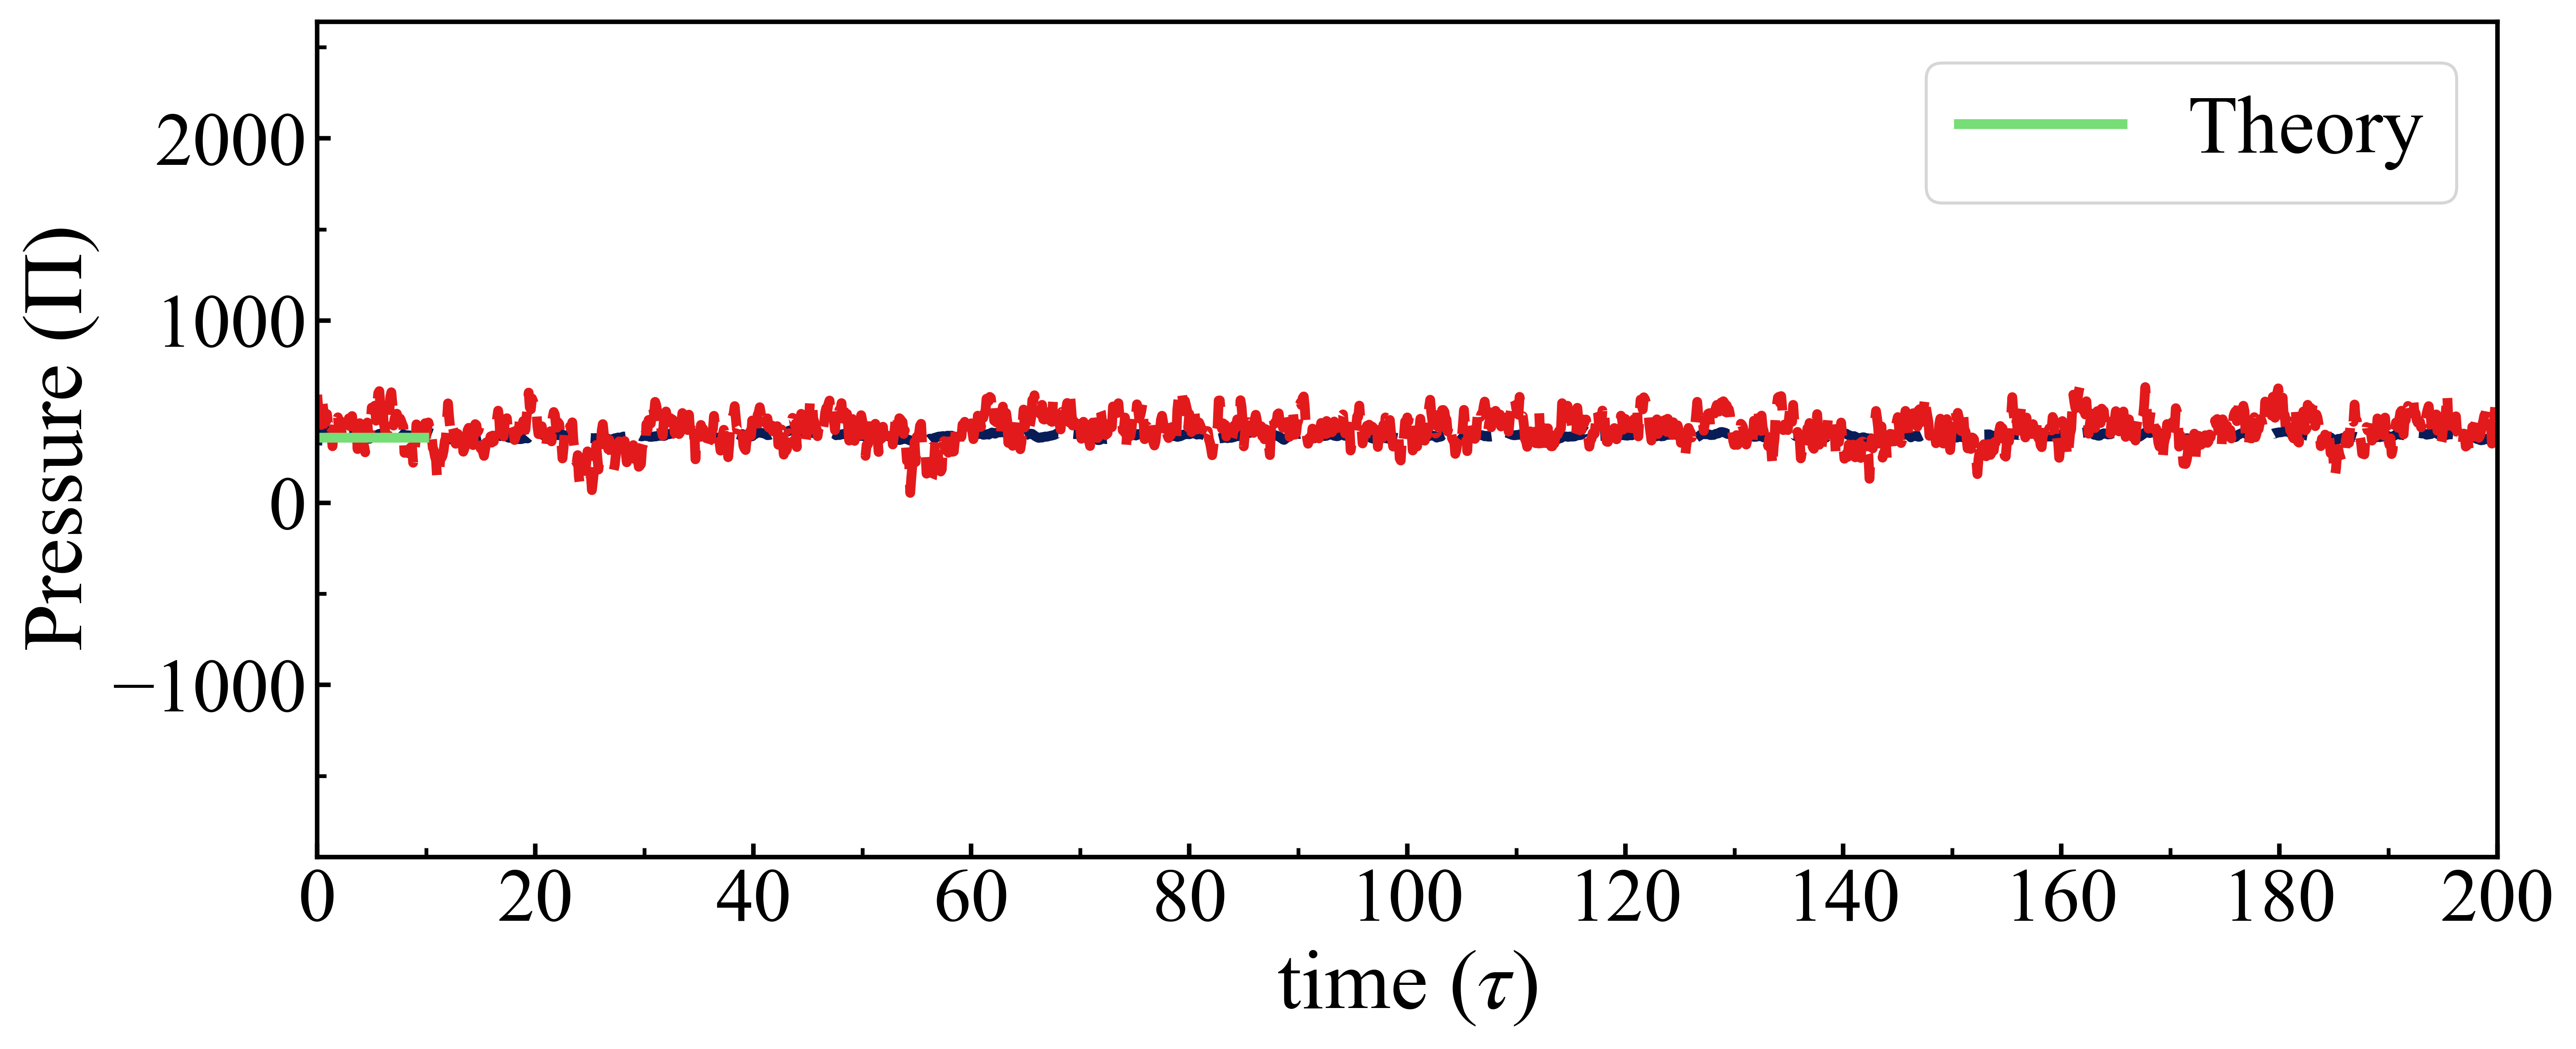

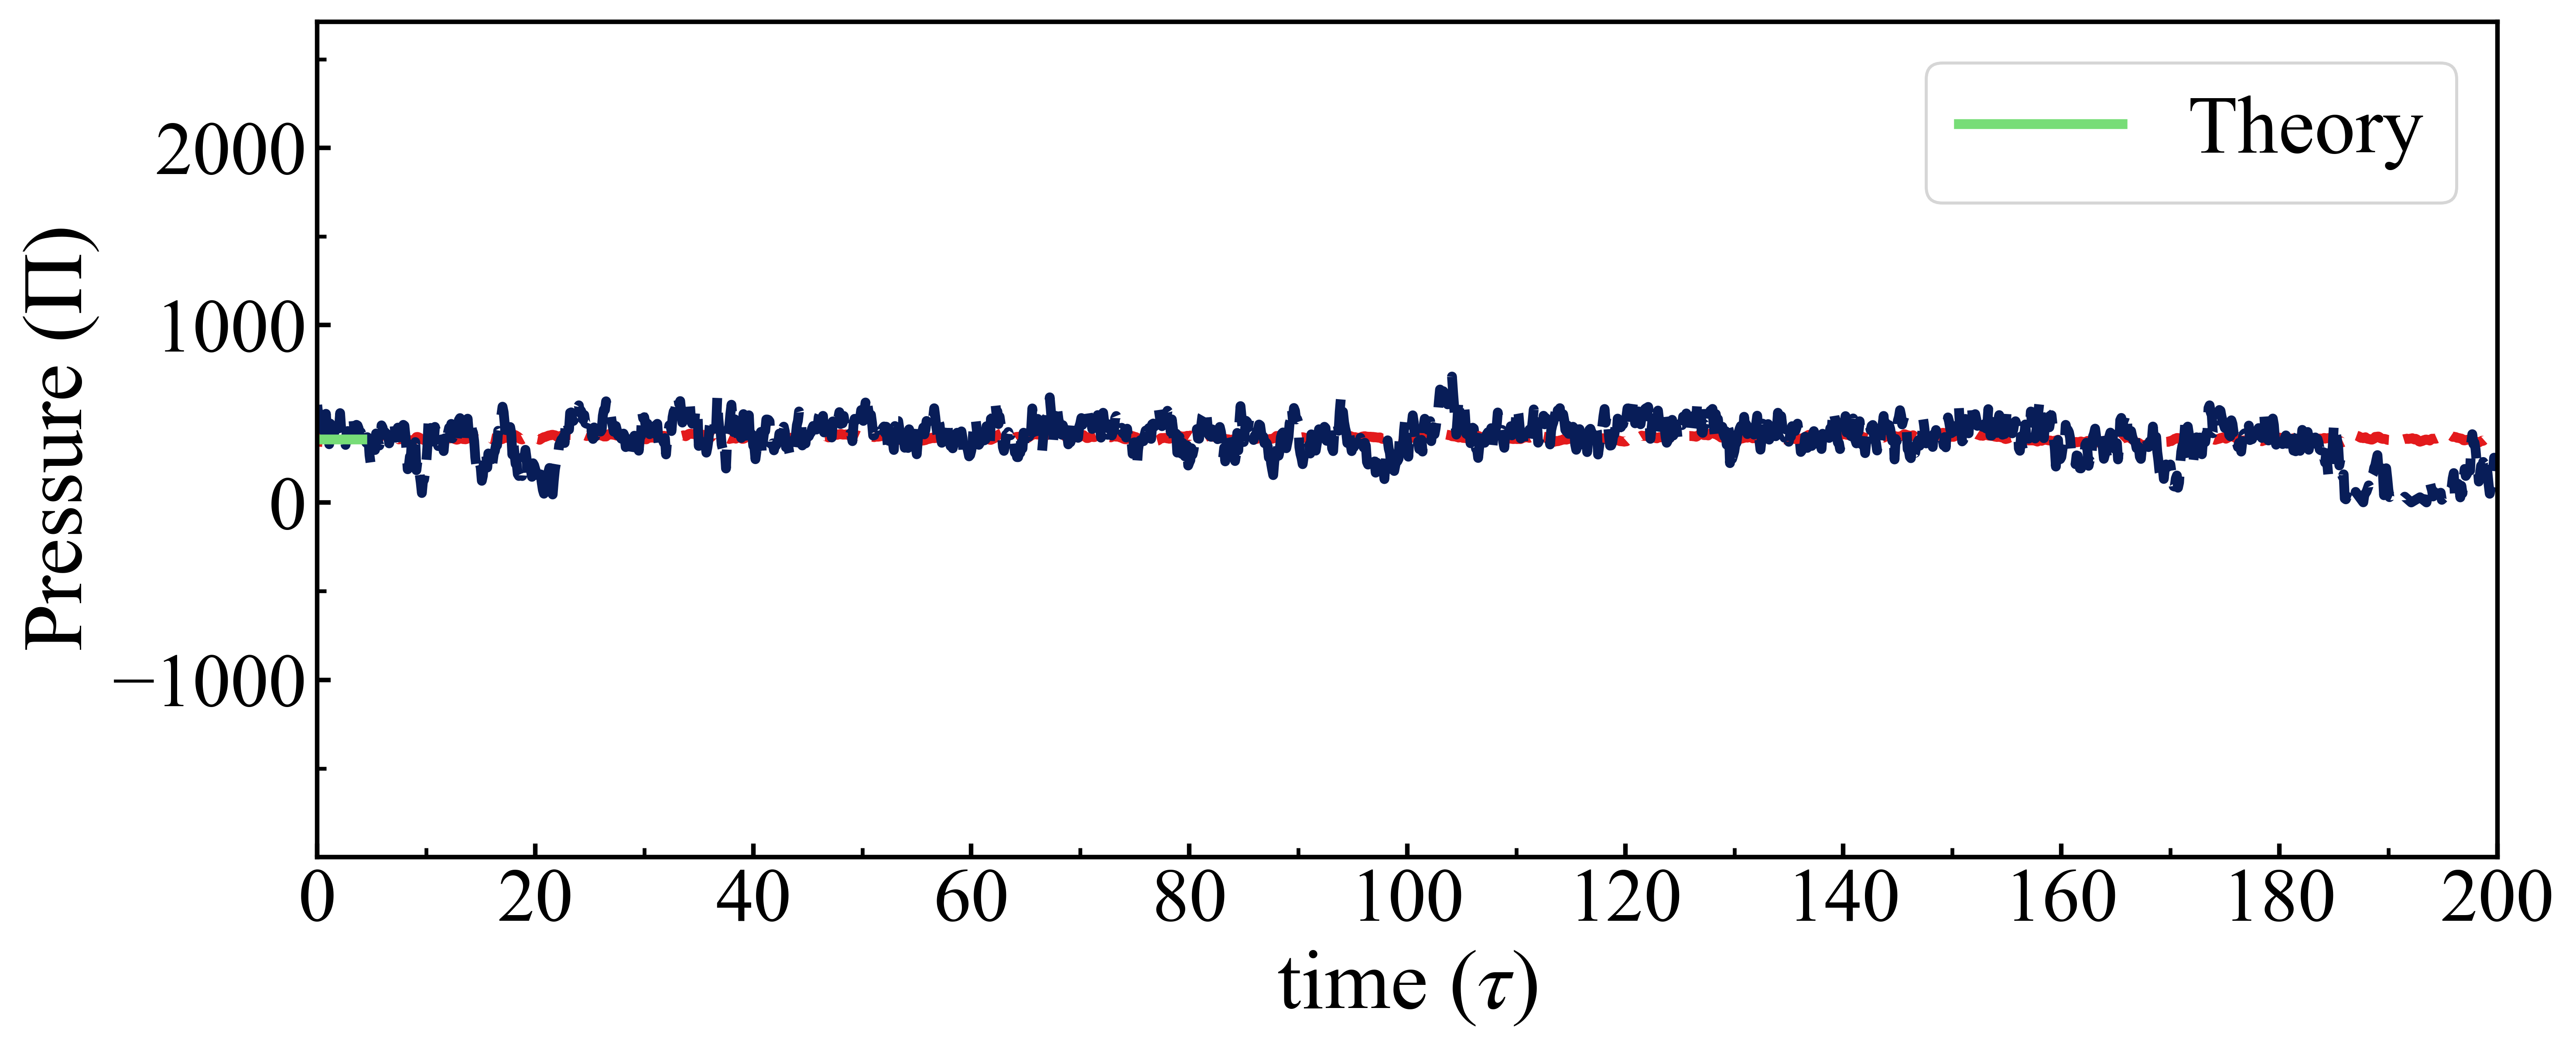

100
150
150
100


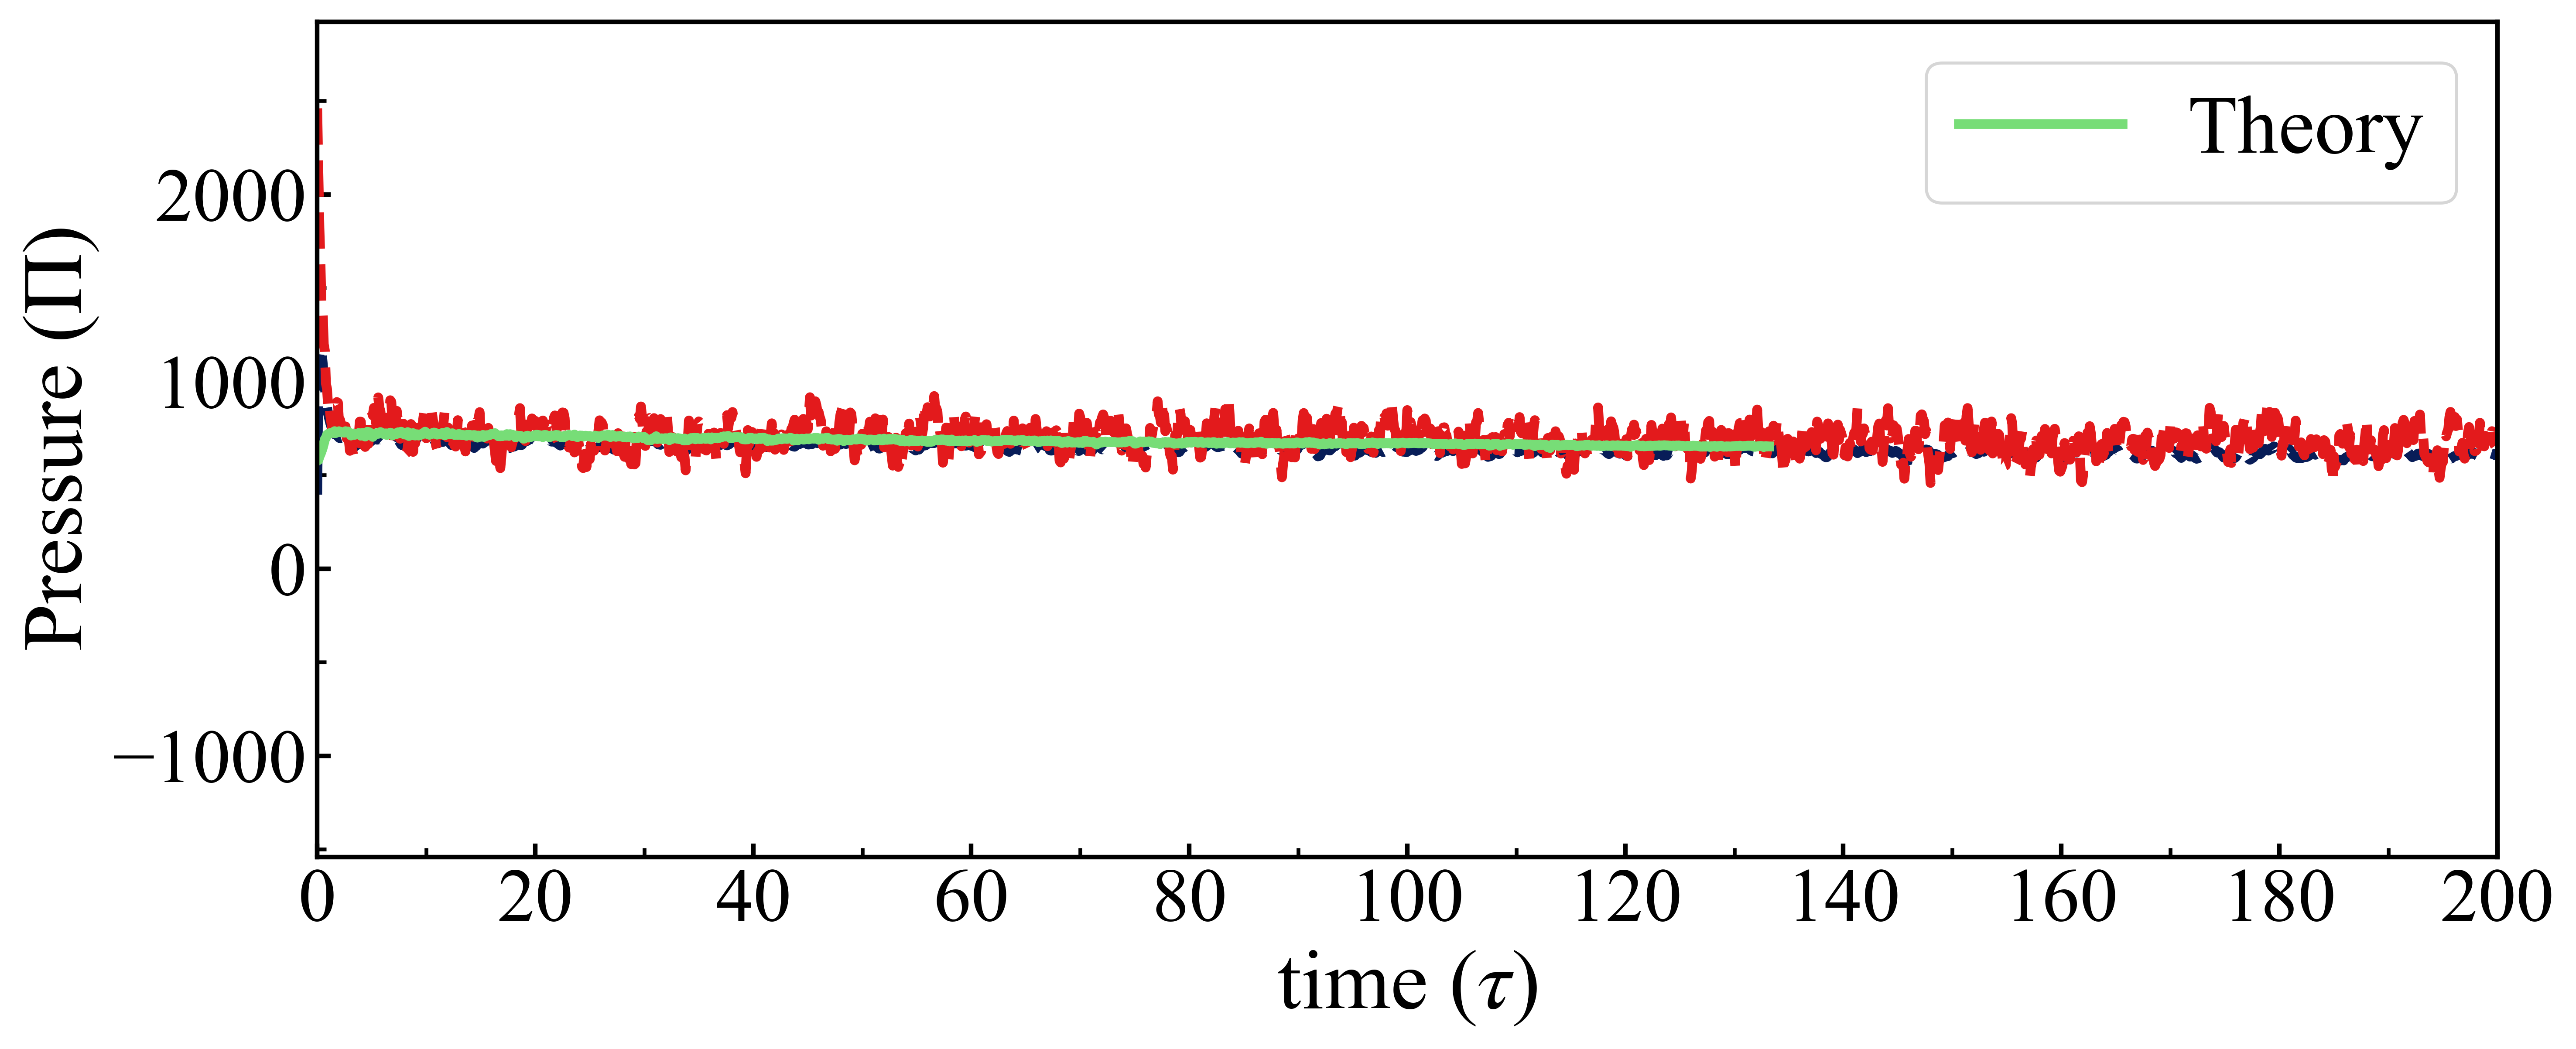

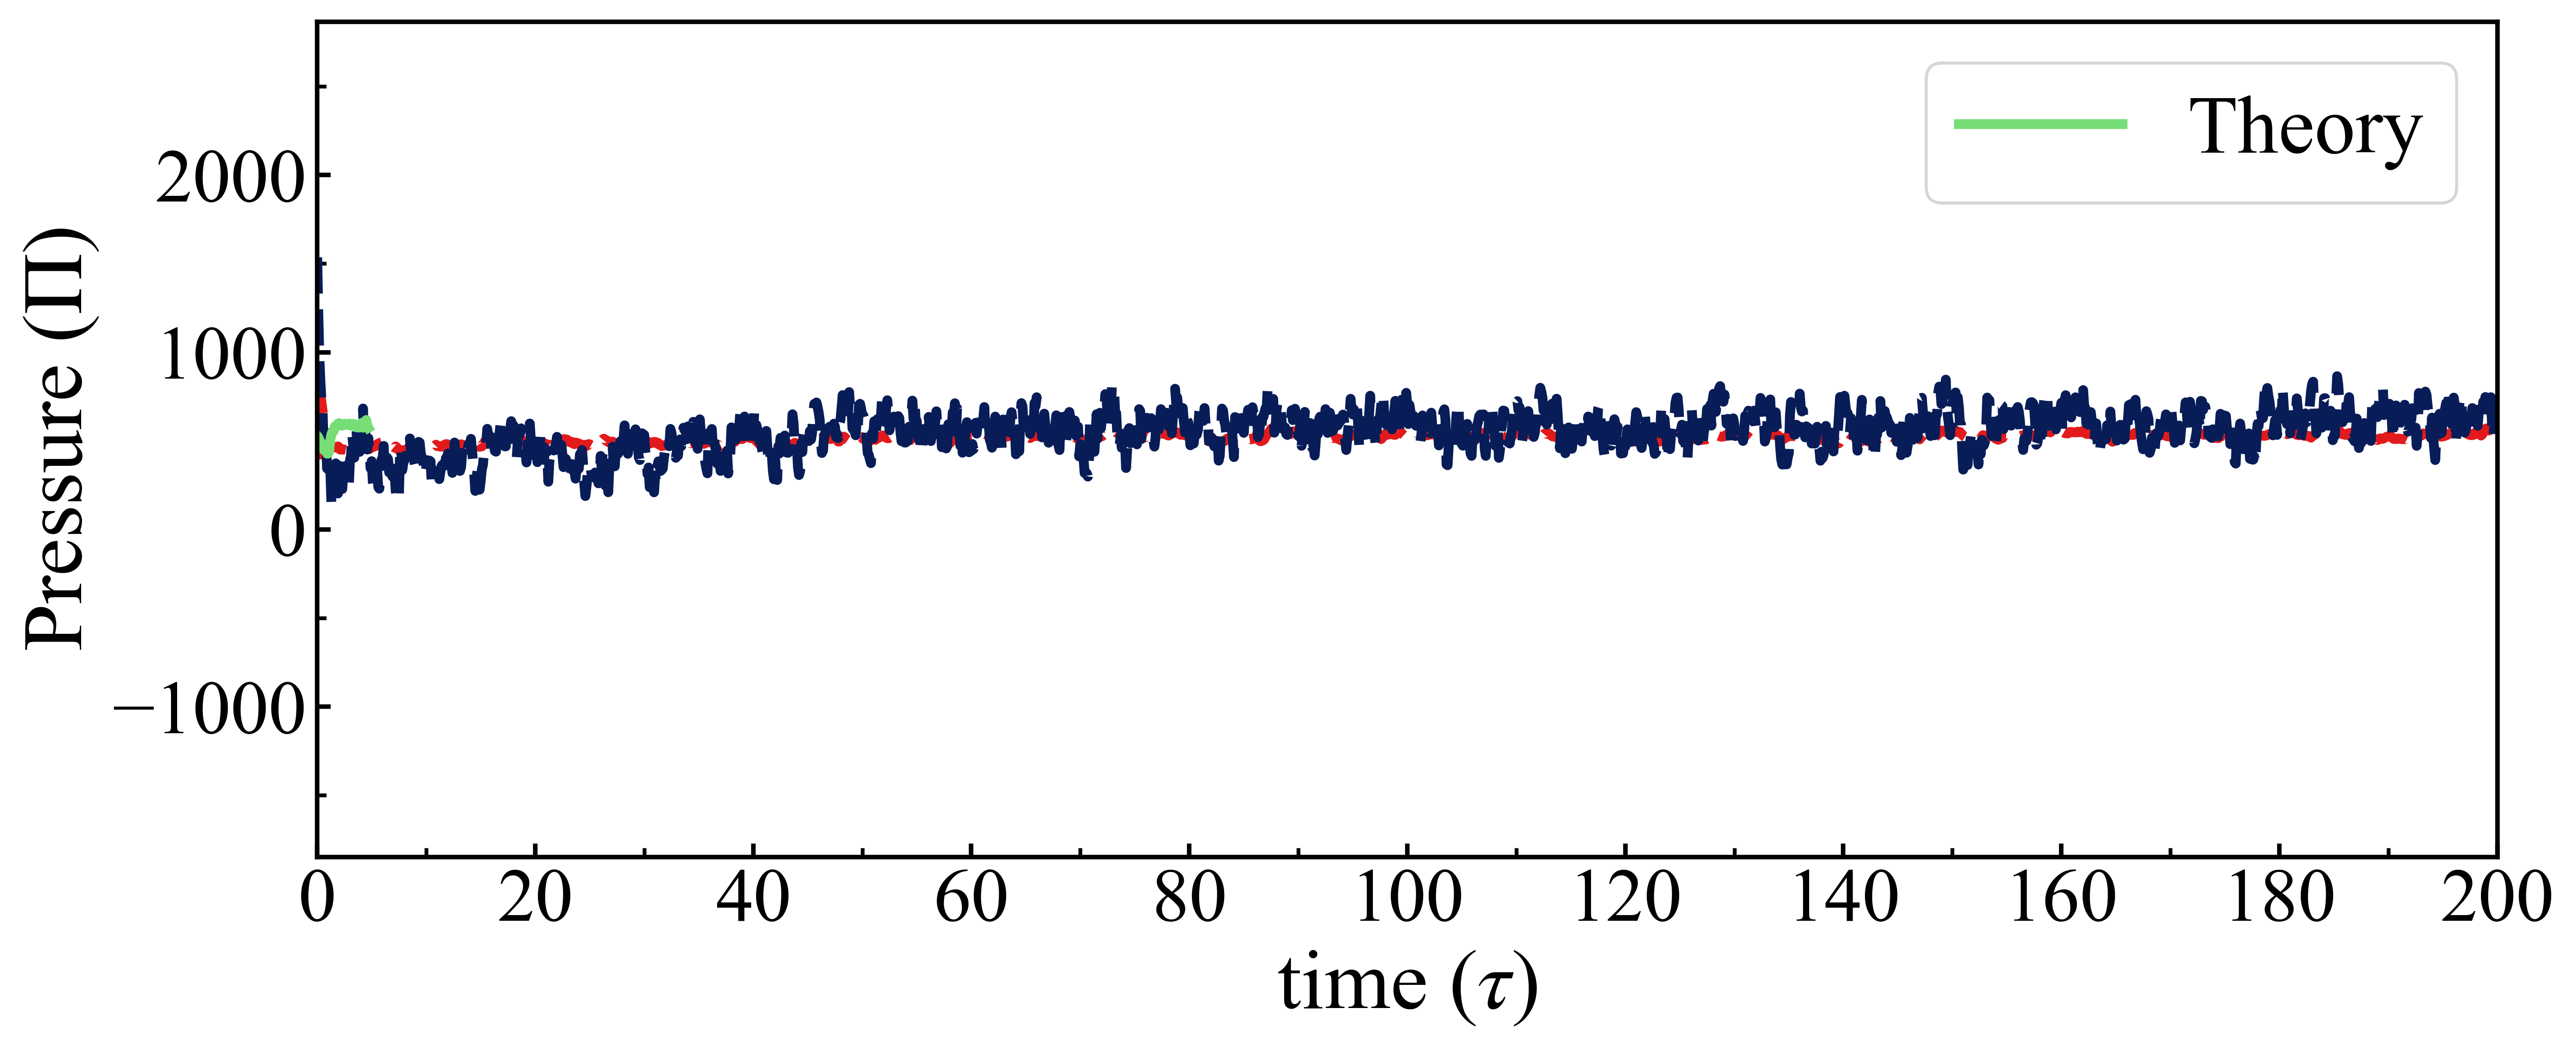

100
200
200
100


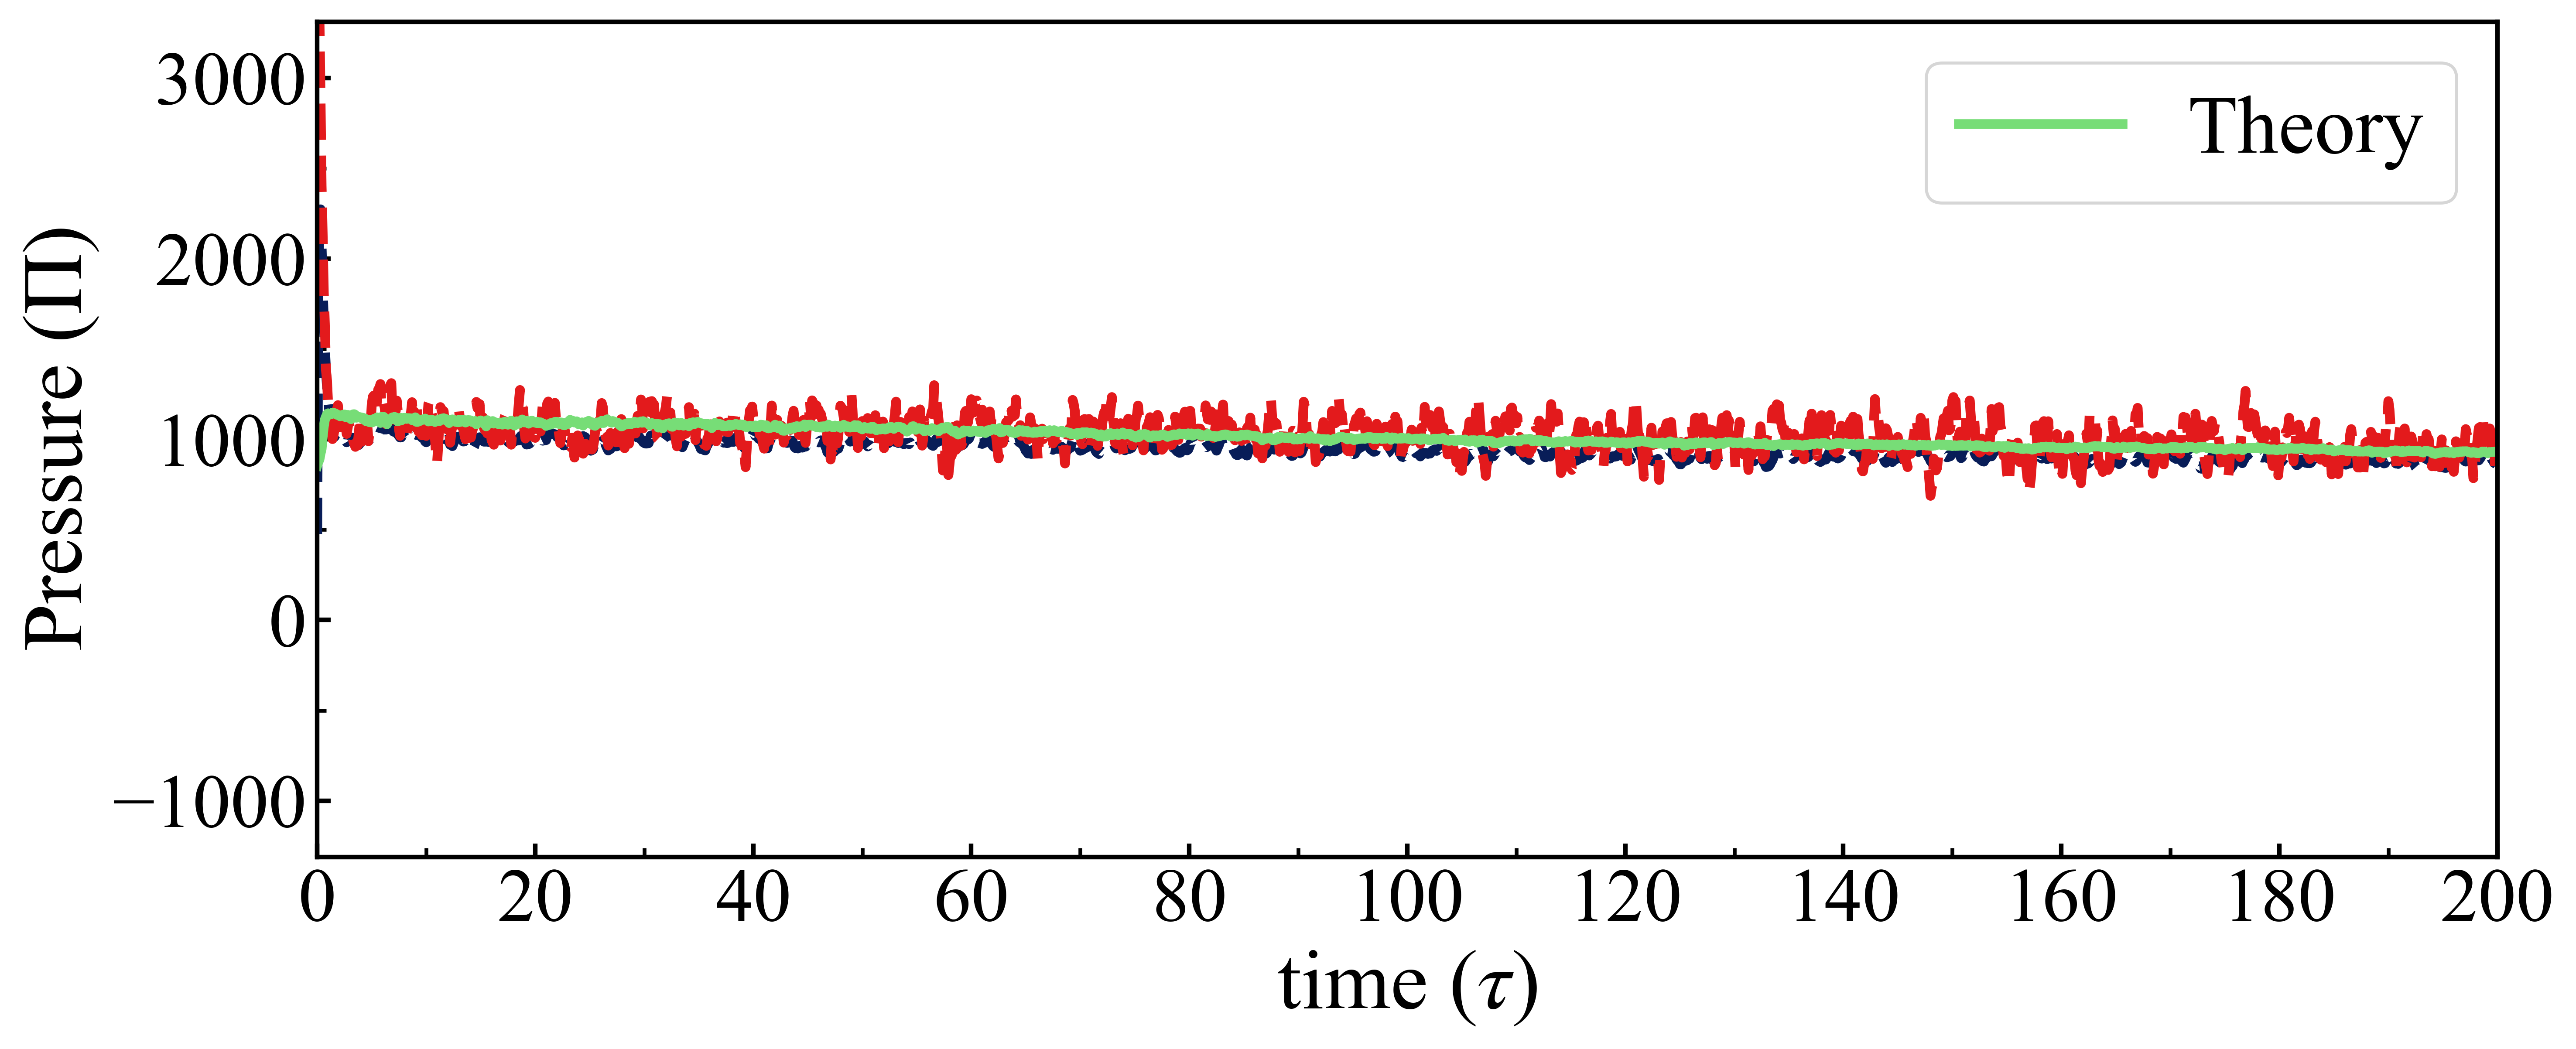

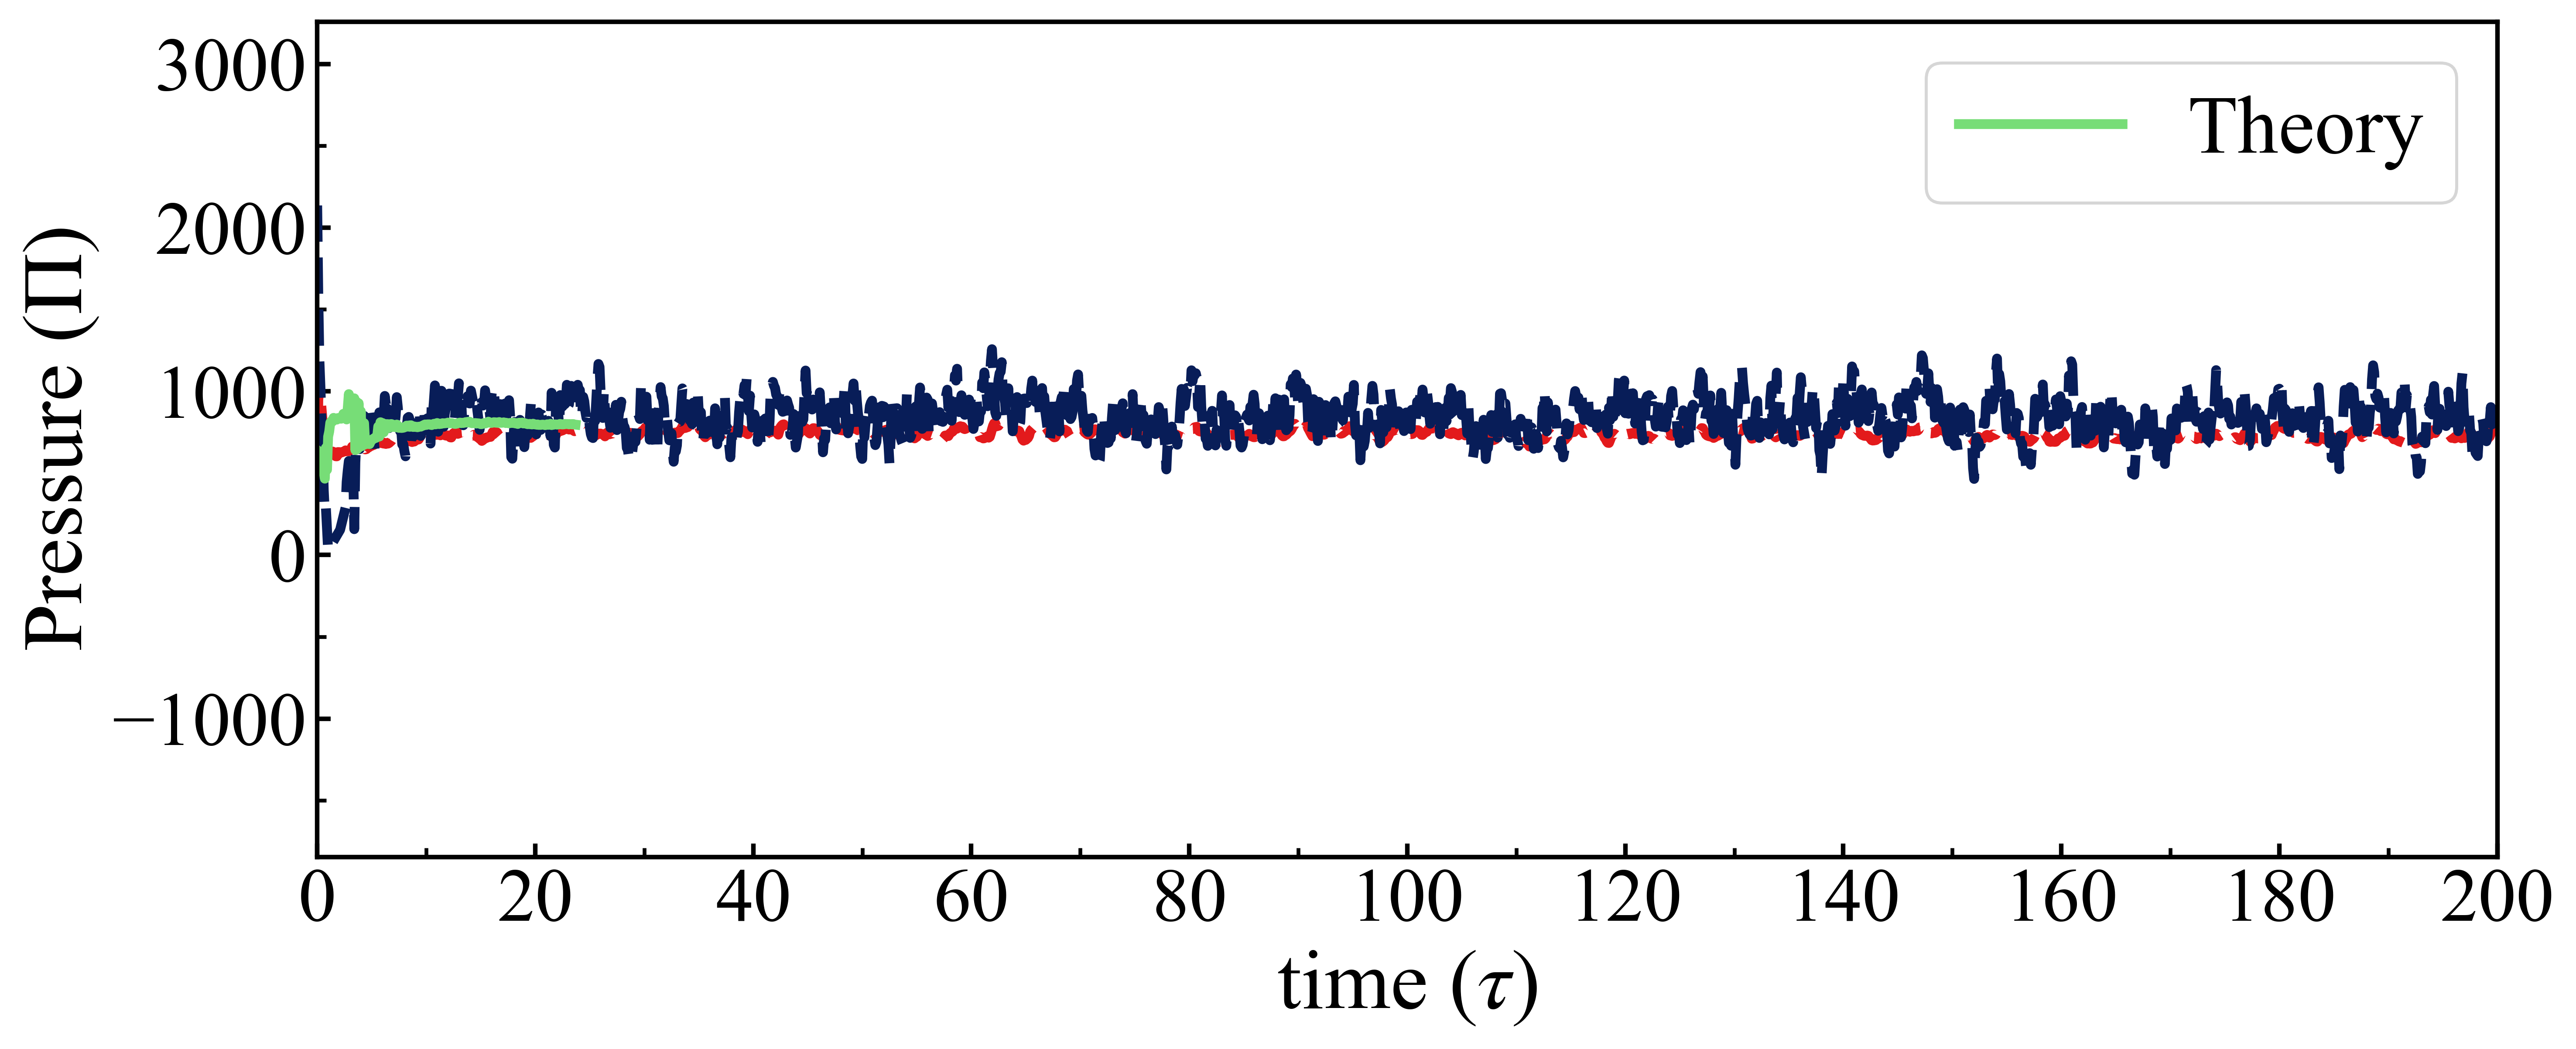

<ipython-input-37-1215e3337d3a>:314: RuntimeWarning: invalid value encountered in true_divide
  bulk_nA_arrs = np.append(bulk_nA_arrs, all_pres_new2s[r]['Na_bulk'][j] / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))
<ipython-input-37-1215e3337d3a>:315: RuntimeWarning: invalid value encountered in true_divide
  bulk_nB_arrs = np.append(bulk_nB_arrs, all_pres_new2s[r]['Nb_bulk'][j] / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))
<ipython-input-37-1215e3337d3a>:316: RuntimeWarning: invalid value encountered in true_divide
  bulk_n_arrs = np.append(bulk_n_arrs, (all_pres_new2s[r]['Nb_bulk'][j]+all_pres_new2s[r]['Na_bulk'][j]) / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))


100
250
250
100


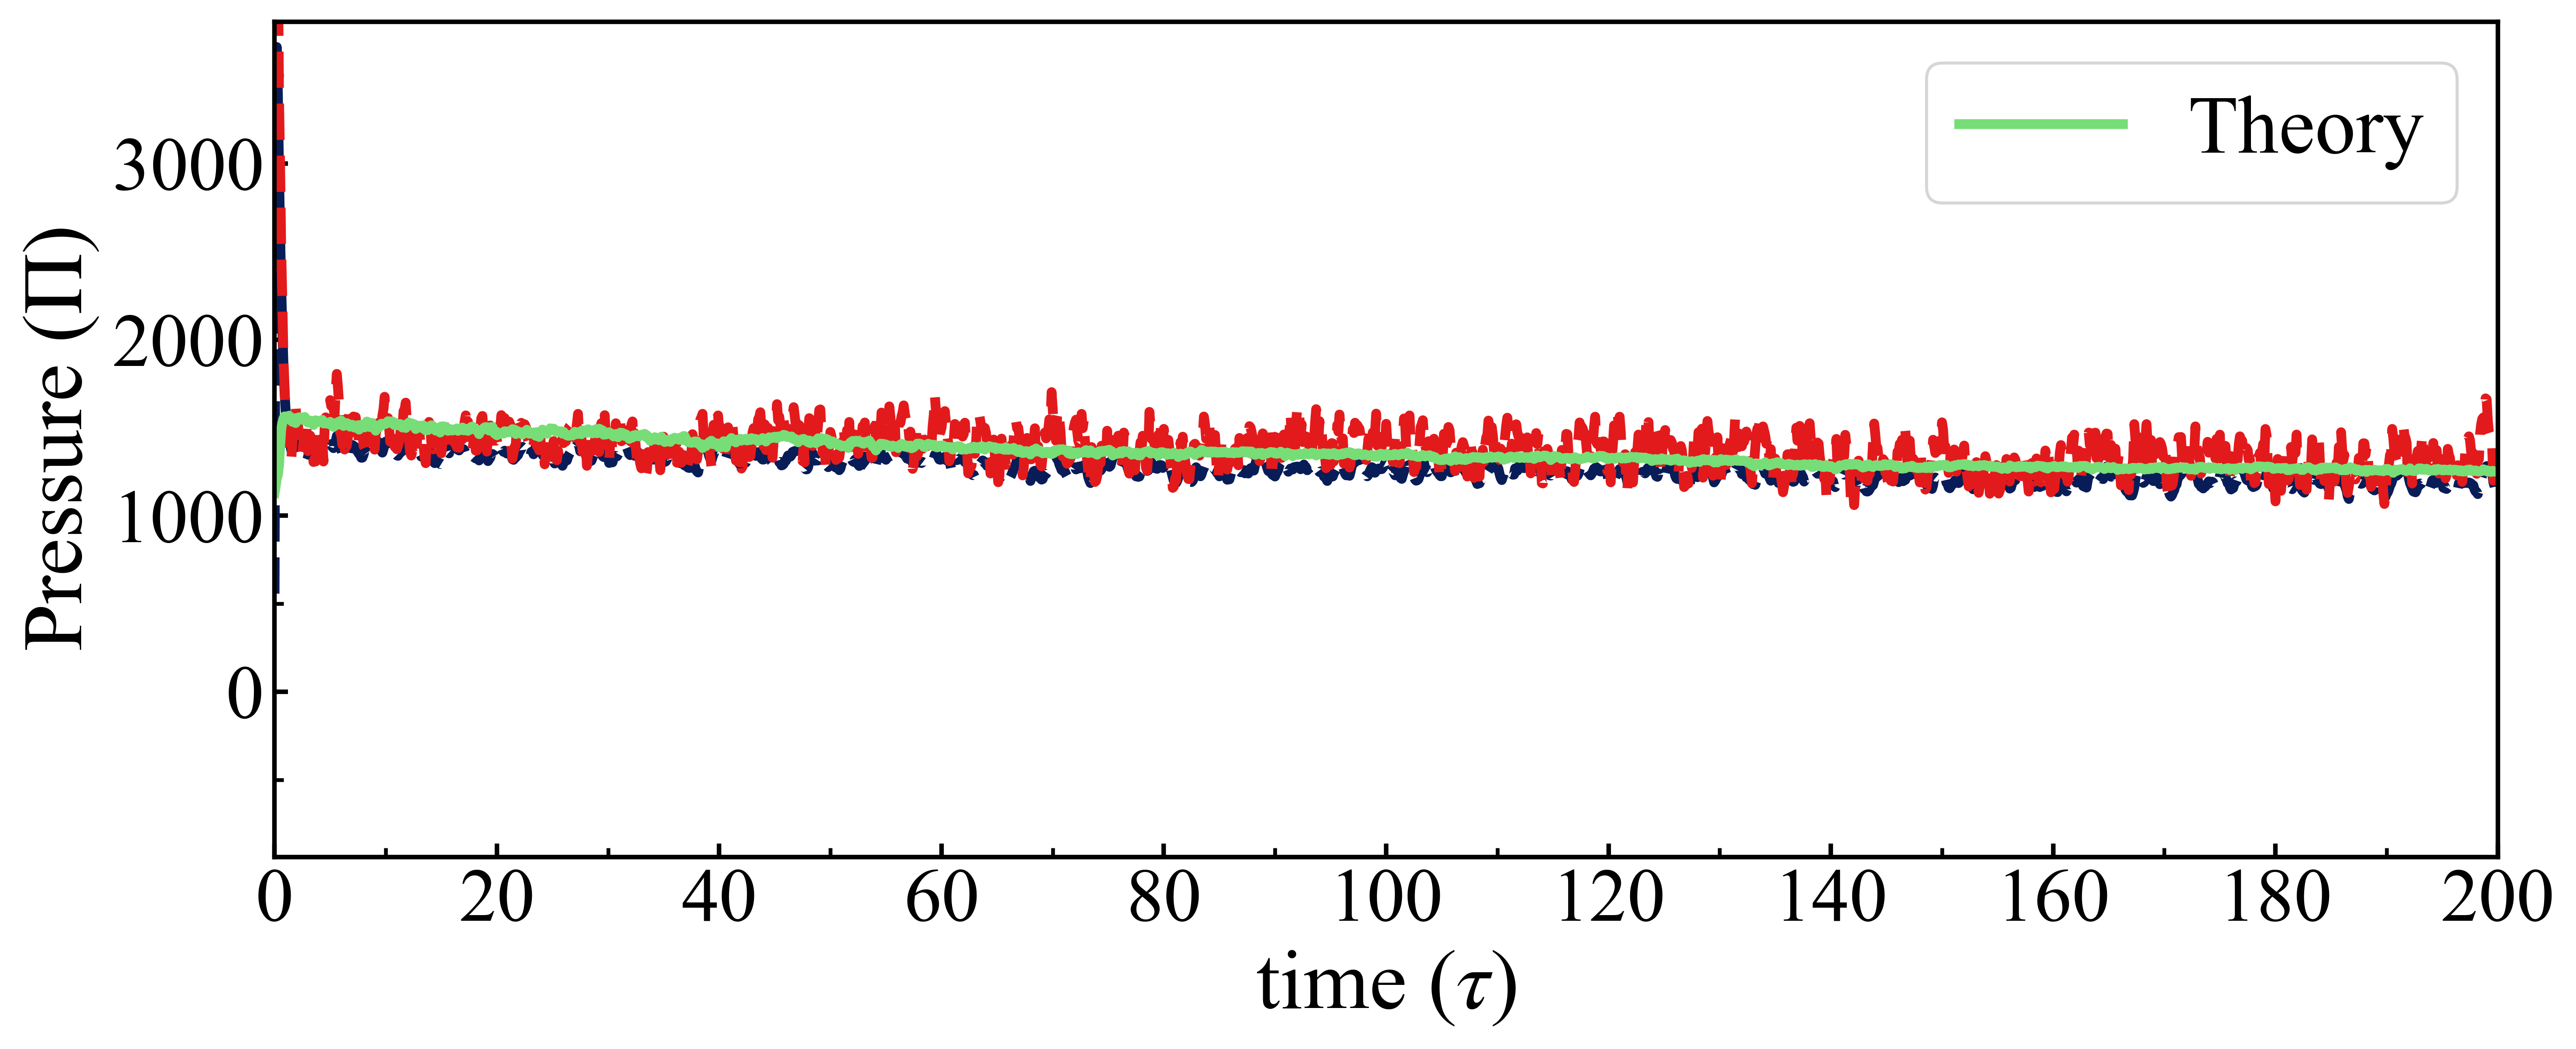

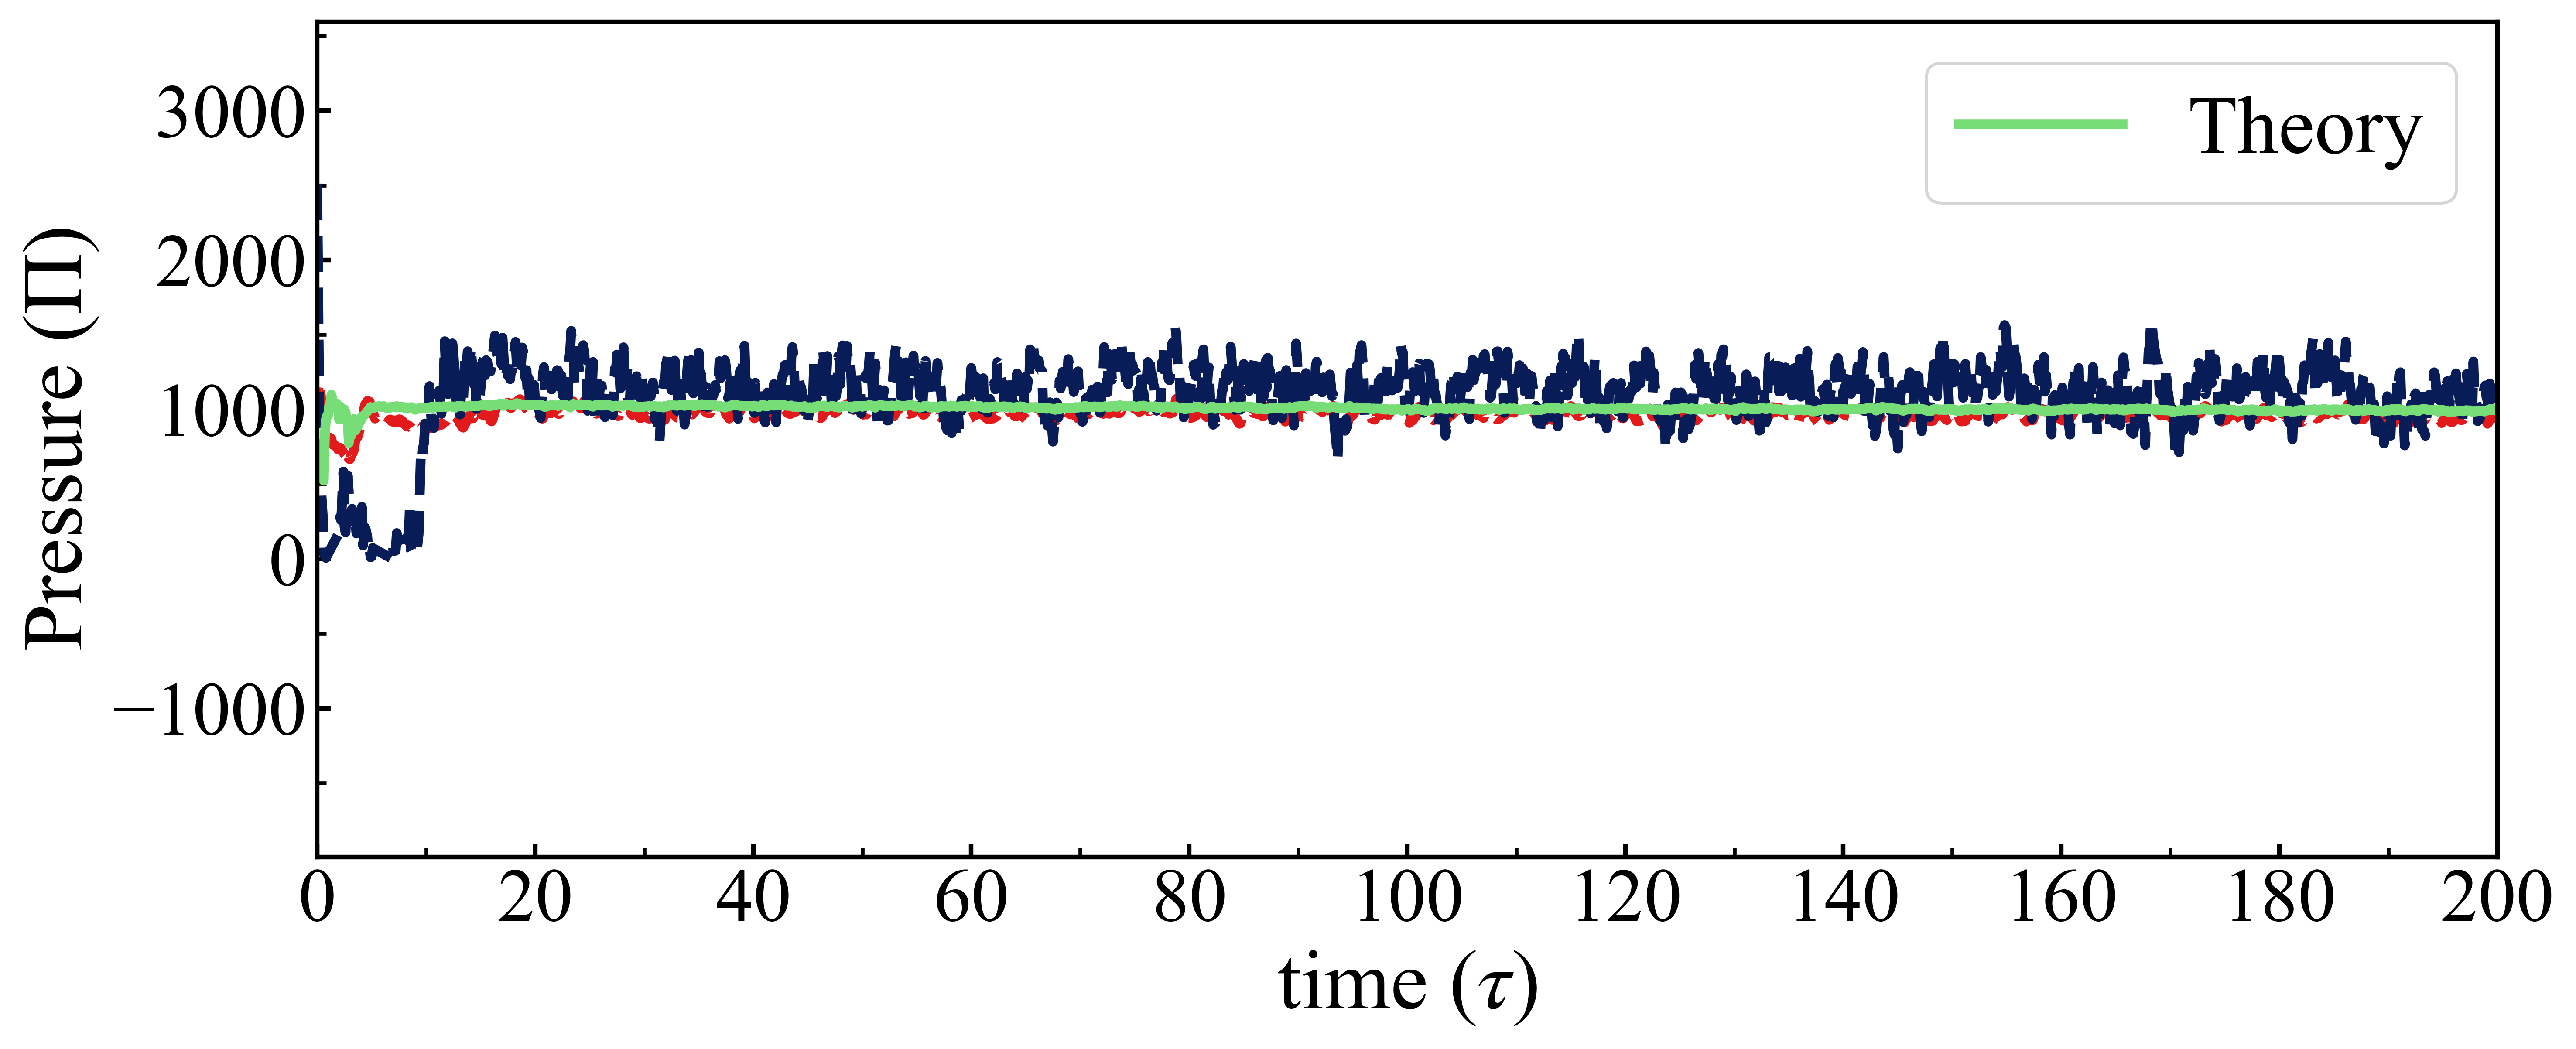

KeyboardInterrupt: 

In [37]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

align_peAs=np.array([])
align_peBs=np.array([])
align_peNets=np.array([])
first_align_peNets=np.array([])
first_interpart_peNets=np.array([])
first_interpart_peAs=np.array([])
first_interpart_peBs=np.array([])

align_xAs=np.array([])
align_epss=np.array([])
align_pnums=np.array([])
align_phis=np.array([])
align_press_arrs = np.array([])
first_align_presss = np.array([])
first_bulk_presss = np.array([])
first_align_peAs=np.array([])
first_align_peBs=np.array([])

interpart_peAs=np.array([])
interpart_peBs=np.array([])
interpart_peNets=np.array([])
interpart_xAs=np.array([])
interpart_epss=np.array([])
interpart_pnums=np.array([])
interpart_phis=np.array([])
interpart_presss=np.array([])
interpart_press_expands=np.array([])
avg_shears=np.array([])

for i in range(0, len(all_dens)):
    if params['peA'][i]>=100:
        align_time =np.array([])
        align_press_time = np.array([])
        align_press_total = 0
        align_press_vals=0

        # Don't plot non-phase-separated data
        if all_dens[i].empty:
                continue

        largest_bubble = np.array([])
        second_largest_bubble = np.array([])
        third_largest_bubble = np.array([])
        fourth_largest_bubble = np.array([])
        fifth_largest_bubble = np.array([])
        tot_time_arr = np.array([])
        max_size = np.amax(all_dens[i]['clust_size'])
        for j in range(0, len(all_dens[i]['clust_size'])):
            #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                tot_time_arr = np.append(tot_time_arr, all_dens[i]['tauB'][j])

                align_press = all_dens[i]['press_align'][j]

                if j==0:
                    first_align_press = np.append(first_align_press, align_press)
                    first_align_peNet=np.append(first_align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                    first_align_peA=np.append(first_align_peA, params['peA'][i])
                    first_align_peB=np.append(first_align_peB, params['peB'][i])

                if align_press > 0:
                    align_time = np.append(align_time, all_dens[i]['tauB'].iloc[j])
                    align_press_time = np.append(align_press_time, align_press)

                    align_press_total += align_press
                    align_press_vals += 1
        if align_press_vals > 50:        
            avg_press = (align_press_total/align_press_vals)
            align_press_arr = np.append(align_press_arr, avg_press)
            align_peA=np.append(align_peA, params['peA'][i])
            align_peB=np.append(align_peB, params['peB'][i])
            align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
            align_xA=np.append(align_xA, params['xA'][i])
            align_phi=np.append(align_phi, params['phi'][i])
            align_eps=np.append(align_eps, params['eps'][i])

        for m in range(0, len(all_denss)):    
            if paramss['peA'][m]==params['peB'][i]:
                if paramss['peB'][m]==params['peA'][i]:
                    align_times =np.array([])
                    align_press_times = np.array([])
                    align_press_totals = 0
                    align_press_valss=0

                    # Don't plot non-phase-separated data
                    if all_denss[m].empty:
                            continue

                    largest_bubbles = np.array([])
                    second_largest_bubbles = np.array([])
                    third_largest_bubbles = np.array([])
                    fourth_largest_bubbles = np.array([])
                    fifth_largest_bubbles = np.array([])
                    tot_time_arrs = np.array([])
                    max_sizes = np.amax(all_denss[m]['clust_size'])
                    for j in range(0, len(all_denss[m]['clust_size'])):
                        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                            tot_time_arrs = np.append(tot_time_arrs, all_denss[m]['tauB'][j])

                            align_presss = all_denss[m]['press_align'][j]

                            if j==0:
                                first_align_presss = np.append(first_align_presss, align_presss)
                                first_align_peNets=np.append(first_align_peNets, paramss['peB'][m] * (1-paramss['xA'][m]/100) + paramss['peA'][m] * (paramss['xA'][m]/100))
                                first_align_peAs=np.append(first_align_peAs, paramss['peA'][m])
                                first_align_peBs=np.append(first_align_peBs, paramss['peB'][m])

                            if align_presss > 0:
                                align_times = np.append(align_times, all_denss[m]['tauB'].iloc[j])
                                align_press_times = np.append(align_press_times, align_presss)

                                align_press_totals += align_press
                                align_press_valss += 1
                    if align_press_valss > 50:        
                        avg_presss = (align_press_totals/align_press_valss)
                        align_press_arrs = np.append(align_press_arrs, avg_presss)
                        align_peAs=np.append(align_peAs, paramss['peA'][m])
                        align_peBs=np.append(align_peBs, paramss['peB'][m])
                        align_peNets=np.append(align_peNets, paramss['peB'][m] * (1-paramss['xA'][m]/100) + paramss['peA'][m] * (paramss['xA'][m]/100))
                        align_xAs=np.append(align_xAs, paramss['xA'][m])
                        align_phis=np.append(align_phis, paramss['phi'][m])
                        align_epss=np.append(align_epss, paramss['eps'][m])

                    for k in range(0, len(all_pres)):
                        if params2['peA'][k]==params['peA'][i]:
                            if params2['peB'][k]==params['peB'][i]:
                                    bulk_time =np.array([])
                                    bulk_press_time = np.array([])
                                    bulk_press_total = 0
                                    bulk_press_total_expand = 0
                                    bulk_press_vals=0
                                    shear_press_expand=0
                                    # Don't plot non-phase-separated data
                                    if all_pres[k].empty:
                                            continue


                                    max_size = np.amax(all_pres[k]['NDense'])
                                    for l in range(0, len(all_pres[k]['NDense'])):


                                        #if all_pres[i]['NDense'][j]>=0.95*max_size:

                                        bulk_trace = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                                        bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[l])

                                        bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2
                                        bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[l])
                                        if l == 0:
                                            first_bulk_press = np.append(first_bulk_press, bulk_press)
                                            first_interpart_peNet=np.append(first_interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                            first_interpart_peA=np.append(first_interpart_peA, params2['peA'][k])
                                            first_interpart_peB=np.append(first_interpart_peB, params2['peB'][k])

                                        shear_stress = (all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l])/2
                                        shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[l])
                                        if bulk_press>0:
                                            bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[l])
                                            bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                            shear_press_expand +=shear_press
                                            bulk_press_total += bulk_press
                                            bulk_press_total_expand += bulk_press_expand
                                            bulk_press_vals += 1
                                    if bulk_press_vals > 50:        
                                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                        interpart_press=np.append(interpart_press, avg_press)
                                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                        interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                        interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                        interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                        interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                        interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                        interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                    for n in range(0, len(all_press)):
                                        if params2s['peA'][n]==params['peB'][i]:
                                            if params2s['peB'][n]==params['peA'][i]:
                                                    bulk_times =np.array([])
                                                    bulk_press_times = np.array([])
                                                    bulk_press_totals = 0
                                                    bulk_press_total_expands = 0
                                                    bulk_press_valss=0
                                                    shear_press_expands=0
                                                    # Don't plot non-phase-separated data
                                                    if all_press[n].empty:
                                                            continue


                                                    max_size = np.amax(all_press[n]['NDense'])
                                                    for l in range(0, len(all_press[n]['NDense'])):


                                                        #if all_pres[i]['NDense'][j]>=0.95*max_size:

                                                        bulk_traces = (all_press[n]['bulkSigXX'].iloc[l]+all_press[n]['bulkSigYY'].iloc[l])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                                                        bulk_presss = bulk_traces / (all_press[n]['bulkArea'].iloc[l])

                                                        bulk_trace_expands = (all_press[n]['bulkSigXX'].iloc[l]+all_press[n]['bulkSigXY'].iloc[l]+all_press[n]['bulkSigYX'].iloc[l]+all_press[n]['bulkSigYY'].iloc[l])/2
                                                        bulk_press_expands = bulk_trace_expands / (all_press[n]['bulkArea'].iloc[l])
                                                        if l == 0:
                                                            first_bulk_presss = np.append(first_bulk_presss, bulk_presss)
                                                            first_interpart_peNets=np.append(first_interpart_peNets, params2s['peB'][n] * (1-params2s['xA'][n]/100) + params2s['peA'][n] * (params2s['xA'][n]/100))
                                                            first_interpart_peAs=np.append(first_interpart_peAs, params2s['peA'][n])
                                                            first_interpart_peBs=np.append(first_interpart_peBs, params2s['peB'][n])

                                                        shear_stresss = (all_press[n]['bulkSigXY'].iloc[l]+all_press[n]['bulkSigYX'].iloc[l])/2
                                                        shear_presss = shear_stresss / (all_press[n]['bulkArea'].iloc[l])
                                                        if bulk_presss>0:
                                                            bulk_times = np.append(bulk_times, all_press[n]['Timestep'].iloc[l])
                                                            bulk_press_times = np.append(bulk_press_times, bulk_presss/2)
                                                            shear_press_expands +=shear_presss
                                                            bulk_press_totals += bulk_presss
                                                            bulk_press_total_expands += bulk_press_expands
                                                            bulk_press_valss += 1
                                                    if bulk_press_valss > 50:        
                                                        avg_shears = np.append(avg_shears, shear_press_expands/bulk_press_valss)
                                                        avg_presss = (bulk_press_totals/(2*bulk_press_valss))
                                                        avg_press_expands = (bulk_press_total_expands/bulk_press_valss)
                                                        interpart_presss=np.append(interpart_presss, avg_presss)
                                                        interpart_press_expands=np.append(interpart_press_expands, avg_press_expands)
                                                        interpart_peAs=np.append(interpart_peAs, params2s['peA'][n])
                                                        interpart_peBs=np.append(interpart_peBs, params2s['peB'][n])
                                                        interpart_peNets=np.append(interpart_peNets, params2s['peB'][n] * (1-params2s['xA'][n]/100) + params2s['peA'][n] * (params2s['xA'][n]/100))
                                                        interpart_xAs=np.append(interpart_xAs, params2s['xA'][n])
                                                        interpart_phis=np.append(interpart_phis, params2s['phi'][n])
                                                        interpart_epss=np.append(interpart_epss, params2s['eps'][n])

                                                    for q in range(0, len(all_pres_new2)):
                                                        if params3['peA'][q]==params['peA'][i]:
                                                            if params3['peB'][q]==params['peB'][i]:

                                                                time_arr3 = np.array([])
                                                                bulk_nA_arr = np.array([])
                                                                bulk_nB_arr = np.array([])
                                                                bulk_n_arr = np.array([])
                                                                int_n_arr = np.array([])
                                                                int_nA_arr = np.array([])
                                                                int_nB_arr = np.array([])
                                                                gas_nA_arr = np.array([])
                                                                gas_nB_arr = np.array([])
                                                                dense_nA_arr = np.array([])
                                                                dense_nB_arr = np.array([])
                                                                dense_n_arr = np.array([])

                                                                for j in range(0, len(all_pres_new2[q]['clust_size'])):
                                                                    #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                                                                        bin_size = all_pres_new2[q]['sizeBin'][j]
                                                                        bin_area = bin_size**2
                                                                        time_arr3 = np.append(time_arr3, all_pres_new2[q]['tauB'][j])
                                                                        bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][j] / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                                                        bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][j] / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                                                        bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][j]+all_pres_new2[q]['Na_bulk'][j]) / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                                                        int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Nb_int'][j]) / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                                                        int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][j] / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                                                        int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][j] / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                                                        gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][j] / (bin_area * all_pres_new2[q]['NBin_gas'][j]))
                                                                        gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][j] / (bin_area * all_pres_new2[q]['NBin_gas'][j]))
                                                                        dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Nb_int'][j]+all_pres_new2[q]['Na_bulk'][j]+all_pres_new2[q]['Nb_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))
                                                                        dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Na_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))
                                                                        dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][j]+all_pres_new2[q]['Nb_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))


                                                                for r in range(0, len(all_pres_new2s)):
                                                                    if params3s['peA'][r]==params['peB'][i]:
                                                                        if params3s['peB'][r]==params['peA'][i]:
                                                                            time_arr3s = np.array([])
                                                                            bulk_nA_arrs = np.array([])
                                                                            bulk_nB_arrs = np.array([])
                                                                            bulk_n_arrs = np.array([])
                                                                            int_n_arrs = np.array([])
                                                                            int_nA_arrs = np.array([])
                                                                            int_nB_arrs = np.array([])
                                                                            gas_nA_arrs = np.array([])
                                                                            gas_nB_arrs = np.array([])
                                                                            dense_nA_arrs = np.array([])
                                                                            dense_nB_arrs = np.array([])
                                                                            dense_n_arrs = np.array([])

                                                                            for j in range(0, len(all_pres_new2s[r]['clust_size'])):
                                                                                bin_size = all_pres_new2s[r]['sizeBin'][j]
                                                                                bin_area = bin_size**2
                                                                                time_arr3s = np.append(time_arr3s, all_pres_new2s[r]['tauB'][j])
                                                                                bulk_nA_arrs = np.append(bulk_nA_arrs, all_pres_new2s[r]['Na_bulk'][j] / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))
                                                                                bulk_nB_arrs = np.append(bulk_nB_arrs, all_pres_new2s[r]['Nb_bulk'][j] / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))
                                                                                bulk_n_arrs = np.append(bulk_n_arrs, (all_pres_new2s[r]['Nb_bulk'][j]+all_pres_new2s[r]['Na_bulk'][j]) / (bin_area * all_pres_new2s[r]['NBin_bulk'][j]))
                                                                                int_n_arrs = np.append(int_n_arrs, (all_pres_new2s[r]['Na_int'][j]+all_pres_new2s[r]['Nb_int'][j]) / (bin_area * all_pres_new2s[r]['NBin_int'][j]))
                                                                                int_nA_arrs = np.append(int_nA_arrs, all_pres_new2s[r]['Na_int'][j] / (bin_area * all_pres_new2s[r]['NBin_int'][j]))
                                                                                int_nB_arrs = np.append(int_nB_arrs, all_pres_new2s[r]['Nb_int'][j] / (bin_area * all_pres_new2s[r]['NBin_int'][j]))
                                                                                gas_nA_arrs = np.append(gas_nA_arrs, all_pres_new2s[r]['Na_gas'][j] / (bin_area * all_pres_new2s[r]['NBin_gas'][j]))
                                                                                gas_nB_arrs = np.append(gas_nB_arrs, all_pres_new2s[r]['Nb_gas'][j] / (bin_area * all_pres_new2s[r]['NBin_gas'][j]))
                                                                                dense_n_arrs = np.append(dense_n_arrs, (all_pres_new2s[r]['Na_int'][j]+all_pres_new2s[r]['Nb_int'][j]+all_pres_new2s[r]['Na_bulk'][j]+all_pres_new2s[r]['Nb_bulk'][j]) / (bin_area * (all_pres_new2s[r]['NBin_int'][j]+all_pres_new2s[r]['NBin_bulk'][j])))
                                                                                dense_nA_arrs = np.append(dense_nA_arrs, (all_pres_new2s[r]['Na_int'][j]+all_pres_new2s[r]['Na_bulk'][j]) / (bin_area * (all_pres_new2s[r]['NBin_int'][j]+all_pres_new2s[r]['NBin_bulk'][j])))
                                                                                dense_nB_arrs = np.append(dense_nB_arrs, (all_pres_new2s[r]['Nb_int'][j]+all_pres_new2s[r]['Nb_bulk'][j]) / (bin_area * (all_pres_new2s[r]['NBin_int'][j]+all_pres_new2s[r]['NBin_bulk'][j])))
                                                                            for s in range(0, len(all_pres_new3)):
                                                                                if params5['peA'][s]==params['peB'][i]:
                                                                                    if params5['peB'][s]==params['peA'][i]:
                                                                                        for t in range(0, len(all_pres_new)):
                                                                                            if params3['peA'][t]==params['peB'][i]:
                                                                                                if params3['peB'][t]==params['peA'][i]:
                                                                                                    radius_arr_final = np.linspace(0,1.6,num=70)
                                                                                                    num_dens_arr_final = np.zeros(70)
                                                                                                    align_arr_final = np.zeros(70)
                                                                                                    press_arr_final = np.zeros(70)
                                                                                                    final_count = np.zeros(70)
                                                                                                    final_count_count = np.zeros(70)
                                                                                            

                                                                                                    # Don't plot non-phase-separated data
                                                                                                    if all_pres_new3[s].empty:
                                                                                                            continue
                                                                                                    time_arr = np.array([])


                                                                                                    max_size = np.amax(all_pres_new3[s]['clust_size'])
                                                                                                    for j in range(0, len(all_pres_new3[s]['clust_size'])):

                                                                                                        time = all_pres_new3[s]['tauB'][j]
                                                                                                        time_id = np.where(all_pres_new3[s]['tauB']==time)[0]
                                                                                                        time_id2 = np.where(all_pres_new[t]['tauB']==time)[0]
                                                                                                        if len(time_id2)>0:
                                                                                                            if len(time_id2)==1:
                                                                                                                edge_width = all_pres_new[t]['radius'][time_id2[0]]
                                                                                                                nB = all_pres_new[t]['Nb'][time_id2[0]]
                                                                                                                nA = all_pres_new[t]['Na'][time_id2[0]]
                                                                                                            elif len(time_id2)>1:
                                                                                                                edge_width = np.max(all_pres_new[t]['radius'][time_id2])
                                                                                                                nB = np.max(all_pres_new[t]['Nb'][time_id2])
                                                                                                                nA = np.max(all_pres_new[t]['Na'][time_id2])
                                                                                                                if time not in time_arr:
                                                                                                                    time_arr = np.append(time_arr, time)  
                                                                                                                    if len(time_arr)>=2:
                                                                                                                        if np.max(radius_arr)<edge_width:
                                                                                                                            for x in range(0, len(radius_arr_final)-1):
                                                                                                                                rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                                                                if len(rad_where)>0:
                                                                                                                                    nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                                                    if len(nonzero_align)>0:
                                                                                                                                        press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                                        align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                                        num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                                        xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                                        xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                                        final_count[x]+=1
                                                                                                                                        final_count_count[x]+=len(rad_where)

                                                                                                                                        press_arr_temp[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                                        align_arr_temp[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                                        num_dens_arr_temp[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                                        temp_count[x]+=1
                                                                                                                                        temp_count_count[x]+=len(rad_where)

                                                                                                                    radius_arr = np.array([])
                                                                                                                    align_arr = np.array([])
                                                                                                                    num_dens_arr = np.array([])
                                                                                                                    press_arr = np.array([])
                                                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][j]/edge_width)   
                                                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][j])   
                                                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][j])   
                                                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][j])   
                                                                                                                else:
                                                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][j]/edge_width)   
                                                                                                                    area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][j]**2)
                                                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][j])   
                                                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][j])   
                                                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][j]) 
                                                                                        
                                                                                        
                                                                                        
                                                                                                    for u in range(0, len(all_pres_new3s)):
                                                                                                        if params5s['peA'][u]==params['peB'][i]:
                                                                                                            if params5s['peB'][u]==params['peA'][i]:
                                                                                                                for v in range(0, len(all_pres_news)):
                                                                                                                    if params3s['peA'][v]==params['peB'][i]:
                                                                                                                        if params3s['peB'][v]==params['peA'][i]:
                                                                                                                            radius_arr_final = np.linspace(0,1.6,num=70)
                                                                                                                            num_dens_arr_final = np.zeros(70)
                                                                                                                            align_arr_final = np.zeros(70)
                                                                                                                            press_arr_final = np.zeros(70)
                                                                                                                            final_count = np.zeros(70)
                                                                                                                            final_count_count = np.zeros(70)


                                                                                                                            # Don't plot non-phase-separated data
                                                                                                                            if all_pres_new3[s].empty:
                                                                                                                                    continue
                                                                                                                            time_arr = np.array([])


                                                                                                                            max_size = np.amax(all_pres_new3[s]['clust_size'])
                                                                                                                            for j in range(0, len(all_pres_new3[s]['clust_size'])):

                                                                                                                                time = all_pres_new3[s]['tauB'][j]
                                                                                                                                time_id = np.where(all_pres_new3[s]['tauB']==time)[0]
                                                                                                                                time_id2 = np.where(all_pres_new[t]['tauB']==time)[0]
                                                                                                                                if len(time_id2)>0:
                                                                                                                                    if len(time_id2)==1:
                                                                                                                                        edge_width = all_pres_new[t]['radius'][time_id2[0]]
                                                                                                                                        nB = all_pres_new[t]['Nb'][time_id2[0]]
                                                                                                                                        nA = all_pres_new[t]['Na'][time_id2[0]]
                                                                                                                                    elif len(time_id2)>1:
                                                                                                                                        edge_width = np.max(all_pres_new[t]['radius'][time_id2])
                                                                                                                                        nB = np.max(all_pres_new[t]['Nb'][time_id2])
                                                                                                                                        nA = np.max(all_pres_new[t]['Na'][time_id2])
                                                                                                                                        if time not in time_arr:
                                                                                                                                            time_arr = np.append(time_arr, time)  
                                                                                                                                            if len(time_arr)>=2:
                                                                                                                                                if np.max(radius_arr)<edge_width:
                                                                                                                                                    for x in range(0, len(radius_arr_final)-1):
                                                                                                                                                        rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                                                                                        if len(rad_where)>0:
                                                                                                                                                            nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                                                                            if len(nonzero_align)>0:
                                                                                                                                                                press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                                                                align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                                                                num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                                                                xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                                                                xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                                                                final_count[x]+=1
                                                                                                                                                                final_count_count[x]+=len(rad_where)

                                                                                                                                                                press_arr_temp[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                                                                align_arr_temp[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                                                                num_dens_arr_temp[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                                                                temp_count[x]+=1
                                                                                                                                                                temp_count_count[x]+=len(rad_where)

                                                                                                                                            radius_arr = np.array([])
                                                                                                                                            align_arr = np.array([])
                                                                                                                                            num_dens_arr = np.array([])
                                                                                                                                            press_arr = np.array([])
                                                                                                                                            radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][j]/edge_width)   
                                                                                                                                            align_arr = np.append(align_arr, all_pres_new3[s]['align'][j])   
                                                                                                                                            xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                                            xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                                            num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][j])   
                                                                                                                                            press_arr = np.append(press_arr, all_pres_new3[s]['press'][j])   
                                                                                                                                        else:
                                                                                                                                            radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][j]/edge_width)   
                                                                                                                                            area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][j]**2)
                                                                                                                                            align_arr = np.append(align_arr, all_pres_new3[s]['align'][j])   
                                                                                                                                            num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][j])   
                                                                                                                                            xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                                            xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][j] / all_pres_new3[s]['num_dens'][j])  
                                                                                                                                            press_arr = np.append(press_arr, all_pres_new3[s]['press'][j]) 
                                                                            print(params['peA'][i])
                                                                            print(params['peB'][i])
                                                                            print(paramss['peA'][m])
                                                                            print(paramss['peB'][m])

                                                                            peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                                            peNet_ints = (((int_nA_arrs/int_n_arrs) * float(paramss['peA'][m]) + (int_nB_arrs/int_n_arrs) * float(paramss['peB'][m])))

                                                                            peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                                                            latNet_int = np.zeros(len(peNet_int))
                                                                            for z in range(0, len(peNet_int)):
                                                                                latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)
                                                                            latNet_ints = np.zeros(len(peNet_ints))
                                                                            for z in range(0, len(peNet_ints)):
                                                                                latNet_ints[z] = getLat(peNet_ints[z] - 50, 1.0)

                                                                            theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int
                                                                            theorysss = (peNet_ints-50) * 2 * 1.92 * np.sqrt(3) / latNet_ints


                                                                            x_range2 = np.array([10000000, 20000000])
                                                                            y_range2 = np.array([theoryss, theoryss])

                                                                            x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                                                            y_range_int = np.array([-1000000, 1000000])

                                                                            fsize=10
                                                                            mpl.rcParams.update({'font.size': 13})
                                                                            mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                            msz=40
                                                                            yellow = ("#fec44f")
                                                                            green = ("#77dd77")
                                                                            red = ("#ff6961")
                                                                            

                                                                            nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                            nonzero_align = np.where(align_press_time>0)[0]
                                                                            nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                            nonzero_aligns = np.where(align_press_times>0)[0]
                                                                            if len(nonzero_bulk)>10:
                                                                                if len(nonzero_align)>10:
                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                    interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                    align_max = np.max(align_press_time[nonzero_align][10:])
                                                                                    if align_max >= interpart_max:
                                                                                        plot_max = align_max + 2000
                                                                                    else:
                                                                                        plot_max = interpart_max + 2000

                                                                                    interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                    align_min = np.min(align_press_time[nonzero_align][10:])
                                                                                    if align_min <= interpart_min:
                                                                                        plot_min = align_min - 2000
                                                                                    else:
                                                                                        plot_min = interpart_min - 2000


                                                                                    plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                                   c=slowCol, lw=1.8*1.8, ls='--')
                                                                                    plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                                                                   c=fastCol, lw=1.8*1.8, ls='--')
                                                                                    plt.plot(time_arr3, theoryss,
                                                                                                   c=green, lw=1.8*1.8, ls='-', label='Theory')
                                                                                    ax1.set_xlim(0, 200)        
                                                                                    # y limits


                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                    # Set all the x ticks for radial plots
                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                    # Set y ticks
                                                                                    loc = ticker.MultipleLocator(base=1000)
                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                    loc = ticker.MultipleLocator(base=500)
                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                    # Left middle plot
                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                    plt.tight_layout()
                                                                                    plt.show()


                                                                            
                                                                            
                                                                            

                                                                            nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                            nonzero_align = np.where(align_press_time>0)[0]
                                                                            nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                            nonzero_aligns = np.where(align_press_times>0)[0]
                                                                            if len(nonzero_bulks)>10:
                                                                                if len(nonzero_aligns)>10:
                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                    interpart_max = np.max(bulk_press_times[nonzero_bulks][10:])
                                                                                    align_max = np.max(align_press_times[nonzero_aligns][10:])
                                                                                    if align_max >= interpart_max:
                                                                                        plot_max = align_max + 2000
                                                                                    else:
                                                                                        plot_max = interpart_max + 2000

                                                                                    interpart_min = np.min(bulk_press_times[nonzero_bulks][10:])
                                                                                    align_min = np.min(align_press_times[nonzero_aligns][10:])
                                                                                    if align_min <= interpart_min:
                                                                                        plot_min = align_min - 2000
                                                                                    else:
                                                                                        plot_min = interpart_min - 2000

                                                                                    plt.plot(bulk_times[nonzero_bulks], bulk_press_times[nonzero_bulks],
                                                                                                   c=fastCol, lw=1.8*1.8, ls='-', label='Bulk')
                                                                                    plt.plot(align_times[nonzero_aligns], align_press_times[nonzero_aligns],
                                                                                                   c=slowCol, lw=1.8*1.8, ls='-', label='Interface')
                                                                                    plt.plot(time_arr3s, theorysss,
                                                                                                   c=green, lw=1.8*1.8, ls='-', label='Theory')

                                                                                    ax1.set_xlim(0, 200)        
                                                                                    # y limits


                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                    # Set all the x ticks for radial plots
                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                    # Set y ticks
                                                                                    loc = ticker.MultipleLocator(base=1000)
                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                    loc = ticker.MultipleLocator(base=500)
                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                    # Left middle plot
                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                    plt.tight_layout()
                                                                                    plt.show()
                                                                        

    

import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

stop
        
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
div_min = -3
min_n = 0
max_n = 20
levels_text=40
level_boundaries = np.linspace(min_n, max_n, levels_text + 1)
tick_locs   = [0.0,np.pi/6,np.pi/3]
tick_labels = ['0',r'$\pi/6$',r'$\pi/3$']

im = plt.scatter(first_interpart_peNet, first_bulk_press, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
im = plt.scatter(first_align_peNet, first_align_press, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
         
yellow_patch = mpatches.Patch(color='yellow', label='Fast Interface')
red_patch = mpatches.Patch(color='green', label='Slow Bulk')
plt.legend(handles=[yellow_patch, red_patch], fancybox=True, framealpha=0.75, ncol=1, fontsize=12, loc='upper left',labelspacing=0.1, handletextpad=0.1)

    
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$', fontsize=20)
plt.ylabel(r'Initial Pressure ($\Pi$)', fontsize=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
div_min = -3
min_n = 0
max_n = 20
levels_text=40
level_boundaries = np.linspace(min_n, max_n, levels_text + 1)
tick_locs   = [0.0,np.pi/6,np.pi/3]
tick_labels = ['0',r'$\pi/6$',r'$\pi/3$']
for i in range(0, len(first_bulk_press)):
    for j in range(0, len(press_fast_dense)):
        if (first_interpart_peA[i]==pa_pair[j]) and (first_interpart_peB[i]==pb_pair[j]):
            im = plt.scatter(first_interpart_peNet[i], ((first_bulk_press[i] - press_slow_dense[j])/press_slow_dense[j])*100, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
        elif (first_interpart_peB[i]==pa_pair[j]) and (first_interpart_peA[i]==pb_pair[j]):
            im = plt.scatter(first_interpart_peNet[i], ((first_bulk_press[i] - press_slow_dense[j])/press_slow_dense[j])*100, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
for i in range(0, len(first_align_press)):
    for j in range(0, len(press_slow_int)):
        if (first_align_peA[i]==pa_pair[j]) and (first_align_peB[i]==pb_pair[j]):
            im = plt.scatter(first_align_peNet[i], ((first_align_press[i]-press_fast_int[j])/press_fast_int[j])*100, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
        elif (first_align_peB[i]==pa_pair[j]) and (first_align_peA[i]==pb_pair[j]):
            im = plt.scatter(first_align_peNet[i], ((first_align_press[i]-press_fast_int[j])/press_fast_int[j])*100, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
yellow_patch = mpatches.Patch(color='yellow', label='Fast Interface')
red_patch = mpatches.Patch(color='green', label='Slow Bulk')
plt.legend(handles=[yellow_patch, red_patch], fancybox=True, framealpha=0.75, ncol=1, fontsize=12, loc='upper left',labelspacing=0.1, handletextpad=0.1)

    
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$', fontsize=20)
plt.ylabel('Percent Error (%)', fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(first_interpart_peNet, first_bulk_press, s=10.0, color='blue', label='bulk interparticle')
plt.scatter(first_align_peNet, first_align_press, s=10.0, color='red', label='aligned interface')


plt.title('fast interface, slow bulk (stable)', fontsize=22)
plt.ylabel(r'Initial Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend(loc='upper left')
plt.ylim([-2500, 25000])
plt.show() 
stop

plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

    
'''
for i in range(0, len(align_peA)):  
    for j in range(0, len(align_peB)):  
        for k in range(0, len(interpart_peA)):  
            for l in range(0, len(interpart_peB)):  
                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):
                    
'''